In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
train=pd.read_csv('train.csv')

In [4]:
train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Check for missing values.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [6]:
train.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


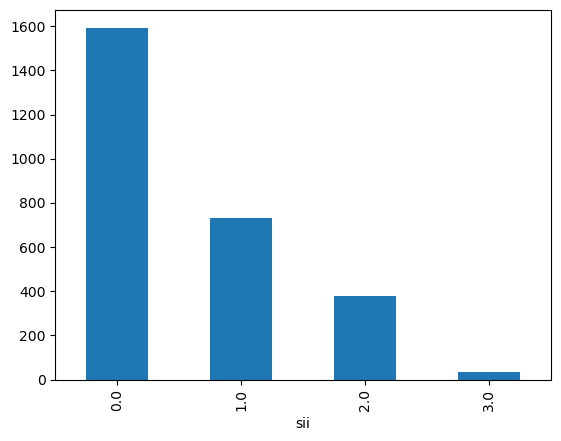

In [7]:
#First look at target variable.and

print(train['sii'].value_counts())
print(train['sii'].value_counts().plot(kind='bar'))

In [8]:
features_quant=['Physical-BMI','Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins',
       'PreInt_EduHx-computerinternet_hoursday']
train_quant=train[features_quant]


In [9]:
import seaborn as sns

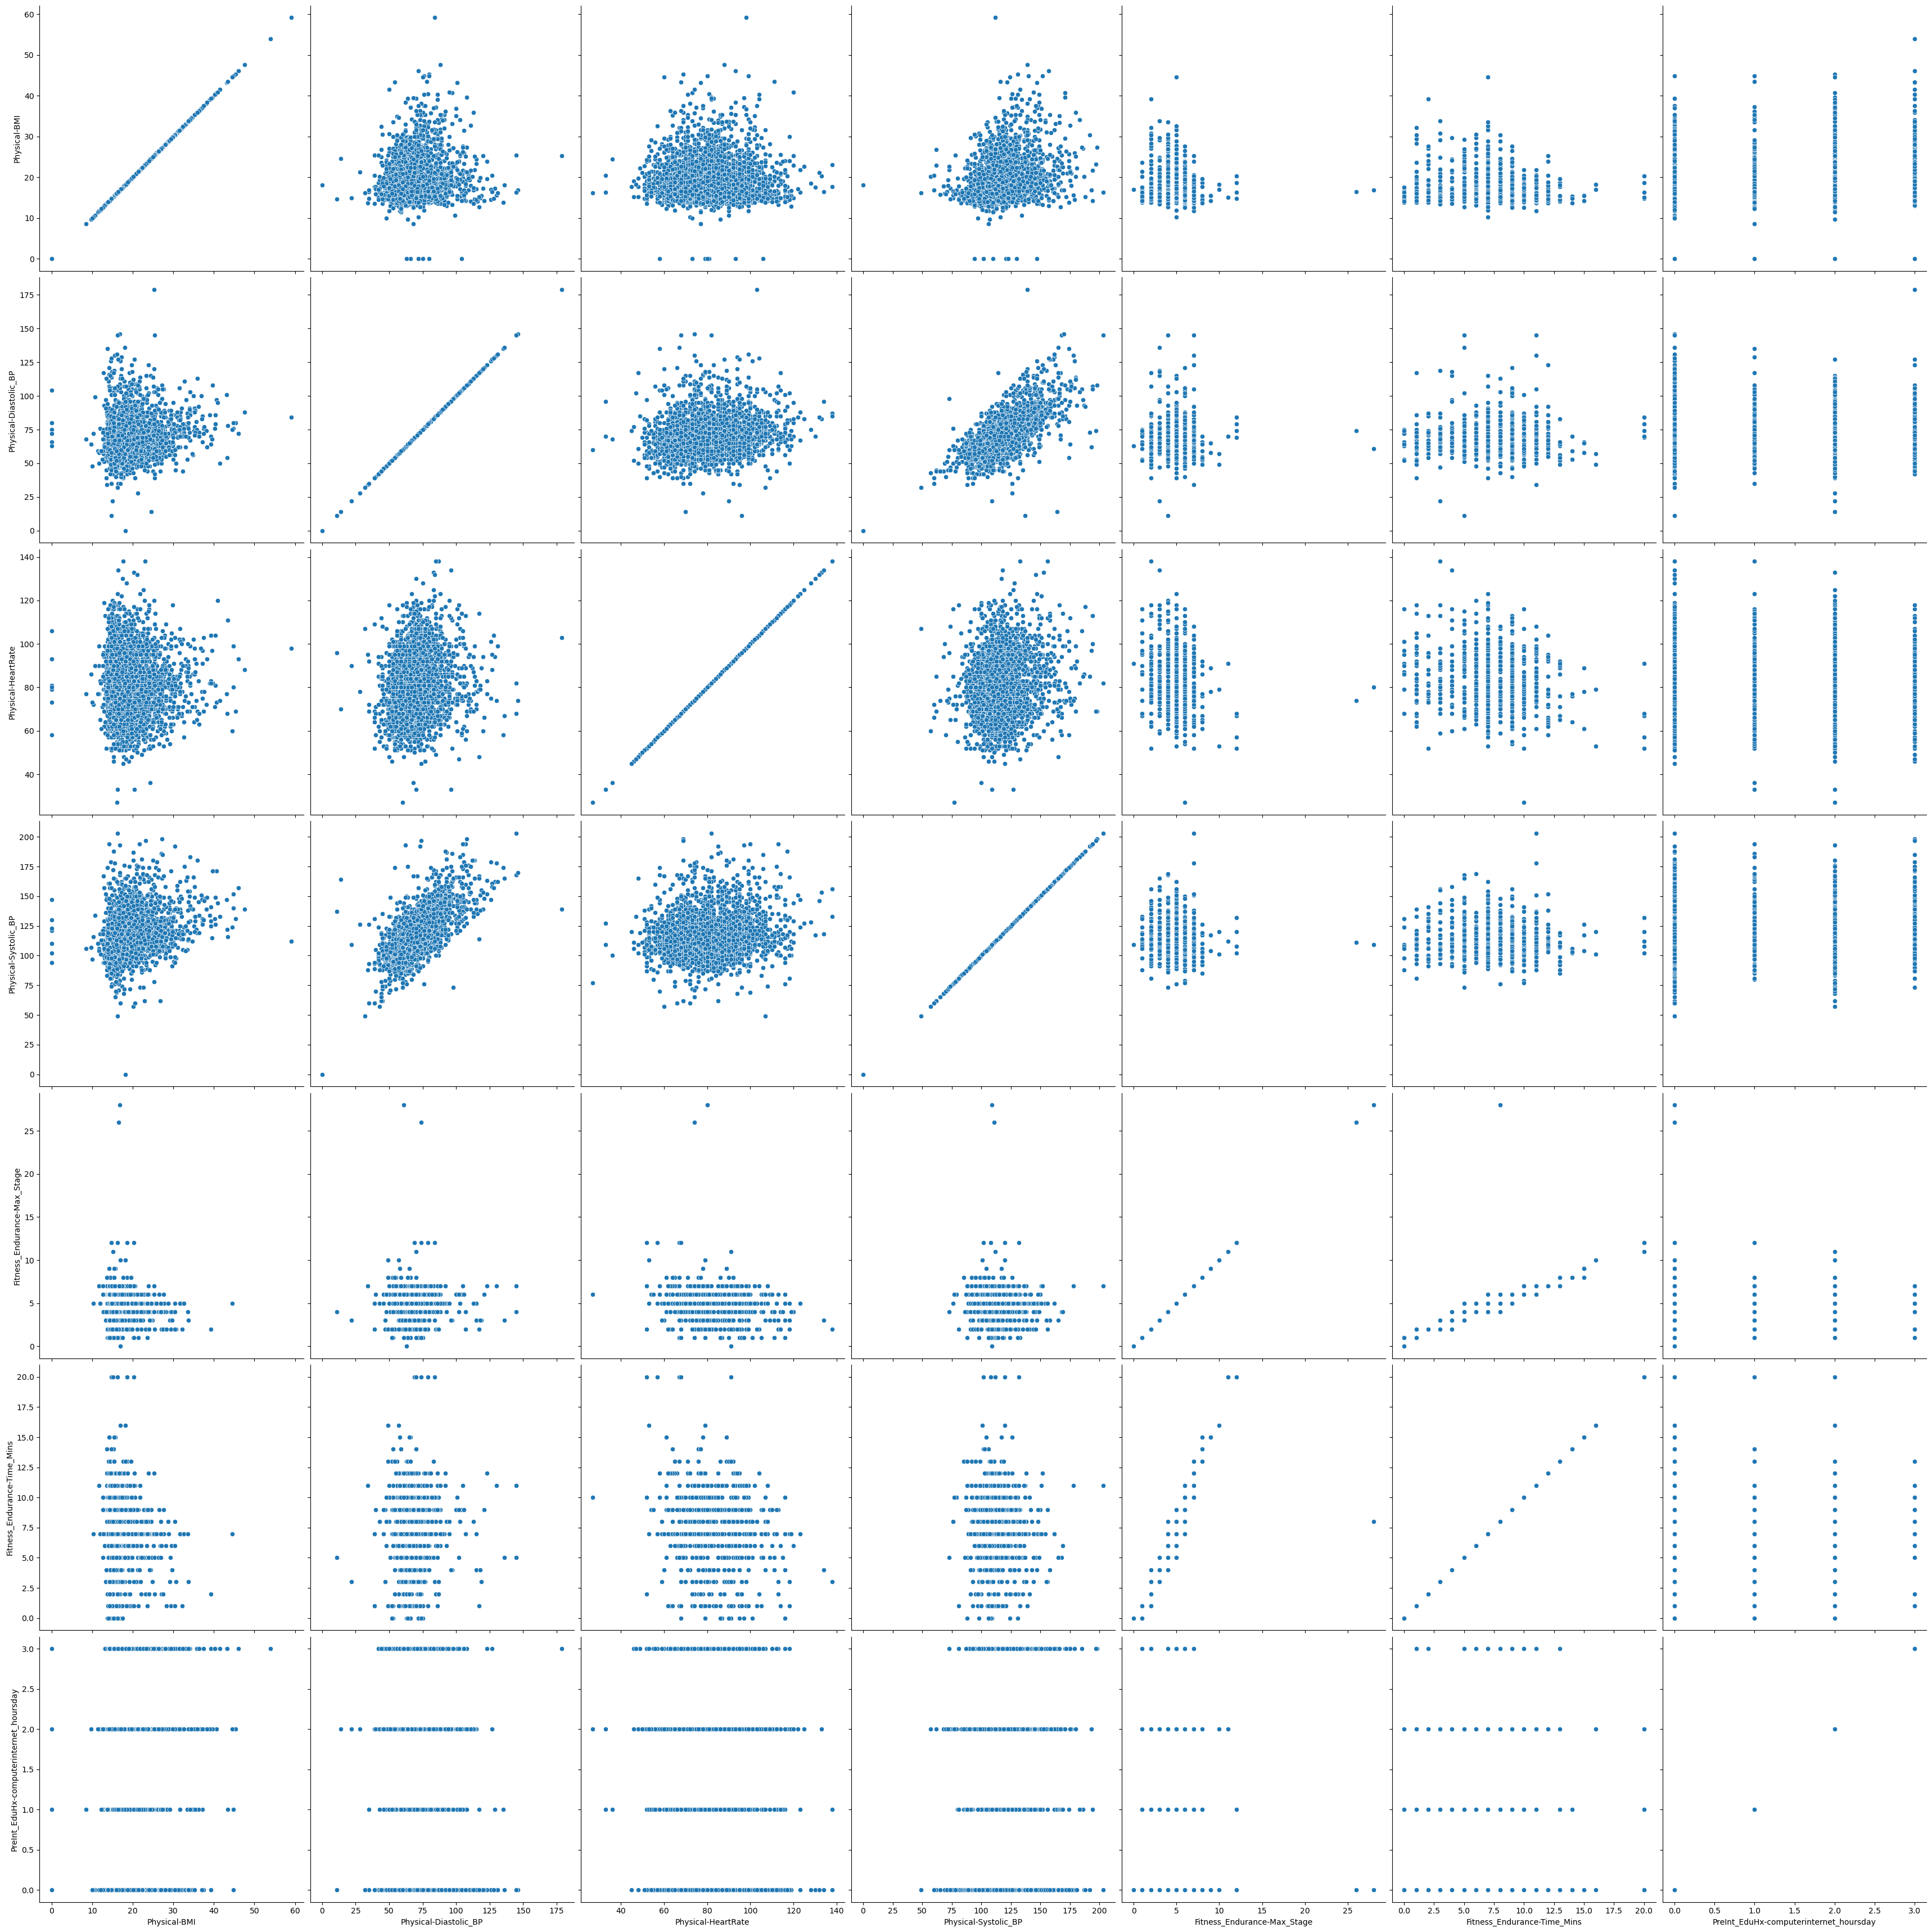

In [10]:
#A look at relationships between a few of the variables.

sns.pairplot(train_quant,
                height = 5,
                diag_kind = None)

plt.show()


The relationship between sii and the number of hours of internet usage per day. Note that "3.0" means three or more hours per day. There seems a clear trend that as sii rating increases, you are more likely to use the internet for more hours per day.


<Axes: xlabel='sii', ylabel='Count'>

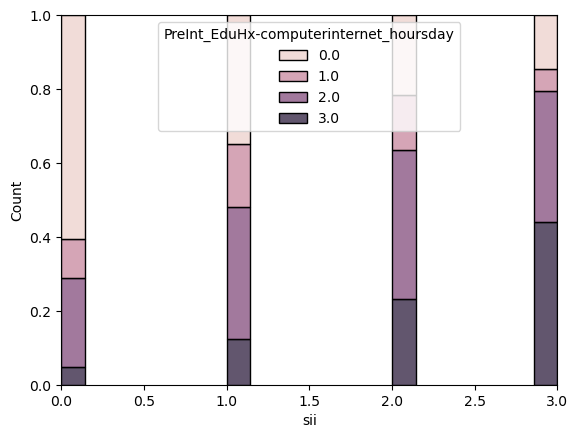

In [11]:
 sns.histplot(x = 'sii', hue ='PreInt_EduHx-computerinternet_hoursday', data = train,multiple = "fill")

The following plots show a variety of variables broken down by sii rating. All of them show some kind of variation across sii ratings, but maybe the most notable is for the endurance test variables and internet usage.


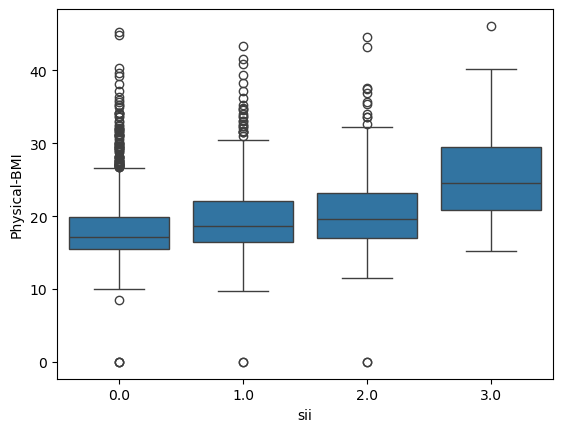

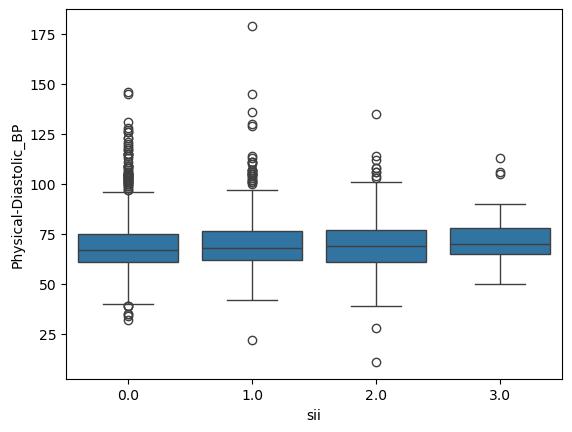

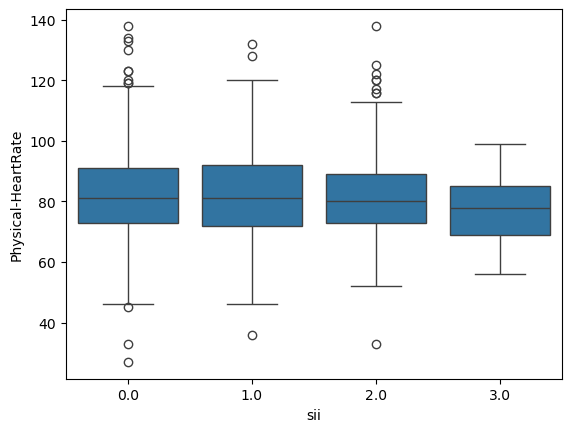

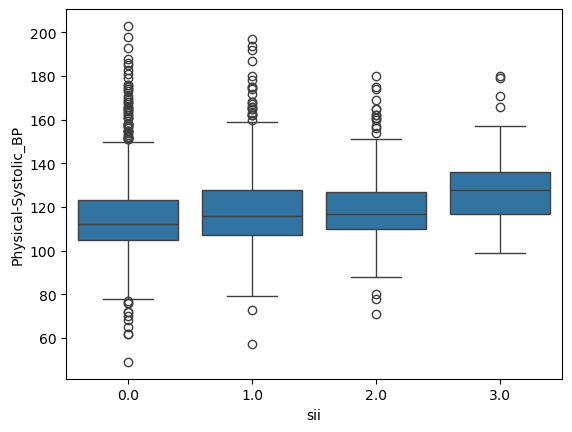

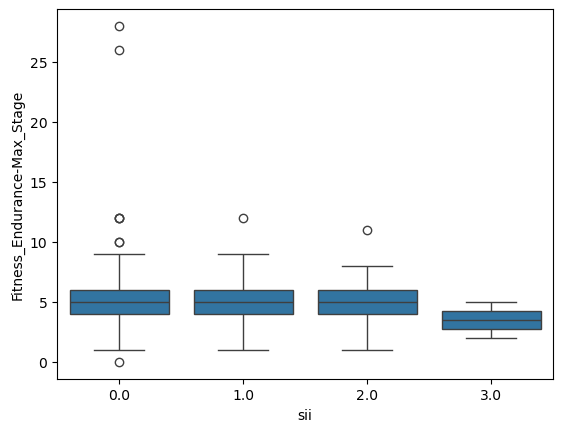

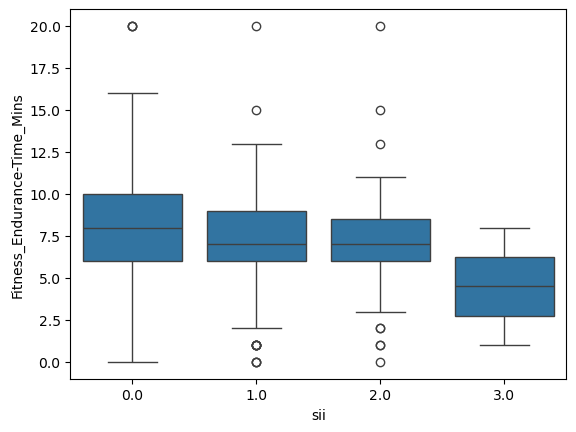

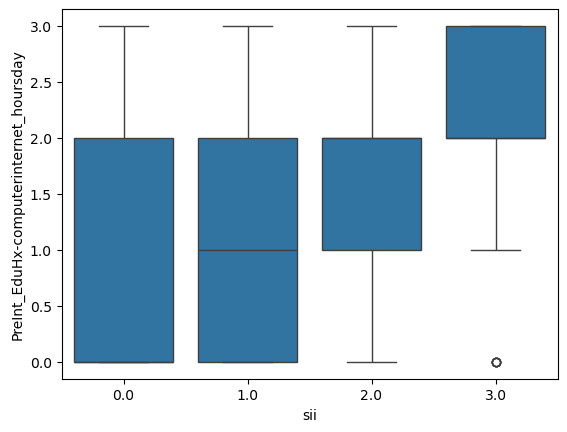

In [12]:
for i in range(len(features_quant)):
    sns.boxplot(x = 'sii',y=features_quant[i],
            data=train)
    plt.show()
    i+=1

Below, break down various variables by the season they are recorded. There doesn't seem to be a lot of variation by season in the outcomes, although there is some in some of the physical and fitness variables, with "healthier" outcomes corresponding to summer and fall.

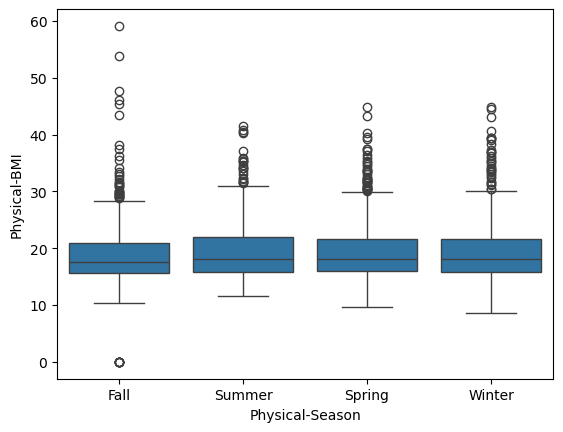

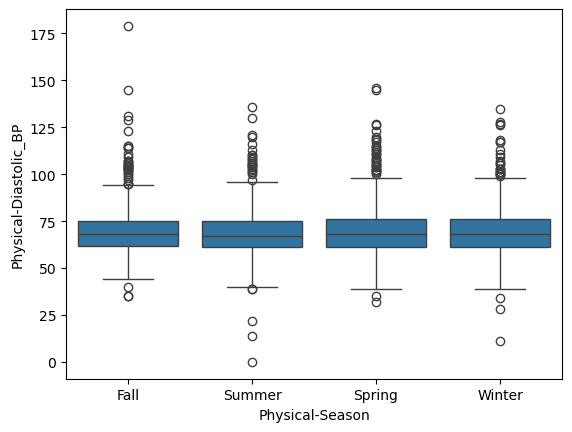

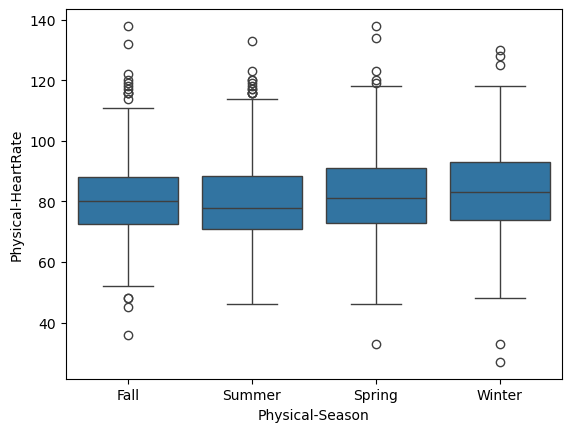

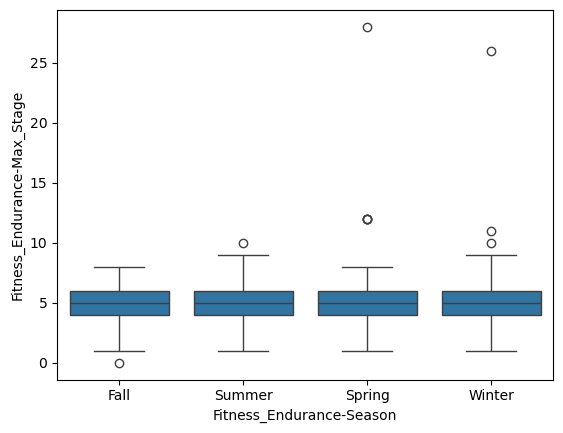

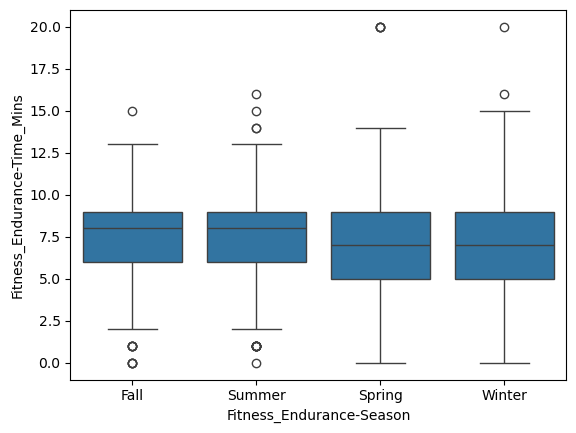

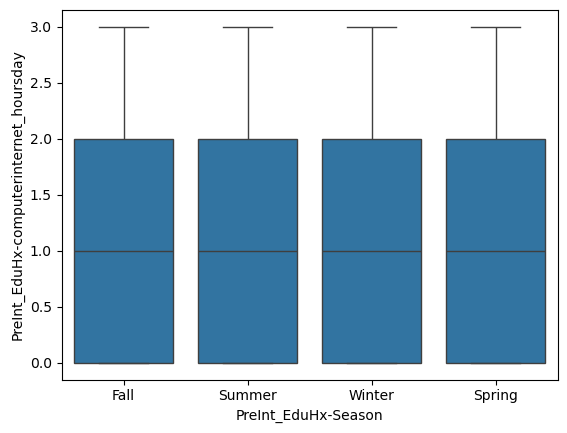

In [13]:
sns.boxplot(x = 'Physical-Season',y='Physical-BMI',
            data=train)
plt.show()

sns.boxplot(x = 'Physical-Season',y='Physical-Diastolic_BP',
            data=train)
plt.show()

sns.boxplot(x = 'Physical-Season',y='Physical-HeartRate',
            data=train)
plt.show()

sns.boxplot(x = 'Fitness_Endurance-Season',y='Fitness_Endurance-Max_Stage',
            data=train)
plt.show()

sns.boxplot(x = 'Fitness_Endurance-Season',y='Fitness_Endurance-Time_Mins',
            data=train)
plt.show()

sns.boxplot(x = 'PreInt_EduHx-Season',y='PreInt_EduHx-computerinternet_hoursday',
            data=train)
plt.show()

The various BIA measures don't seem to be useful for the purposes of the Child Mind Institute, but let's look at the relationship between these varibles and sii anyway. Note that there are some very extreme outliers in some of the data. It seems like these could be a measurement error?

In [14]:
features_BIA=['BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW']

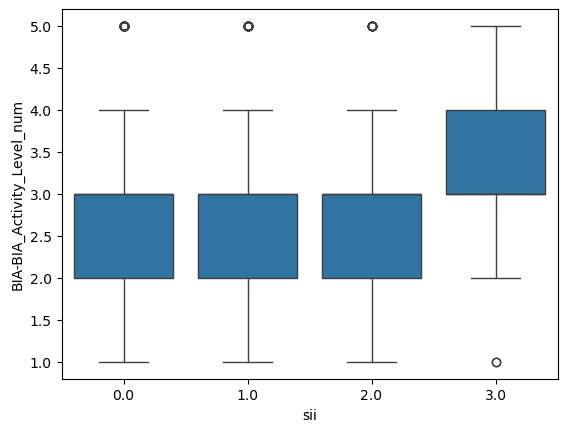

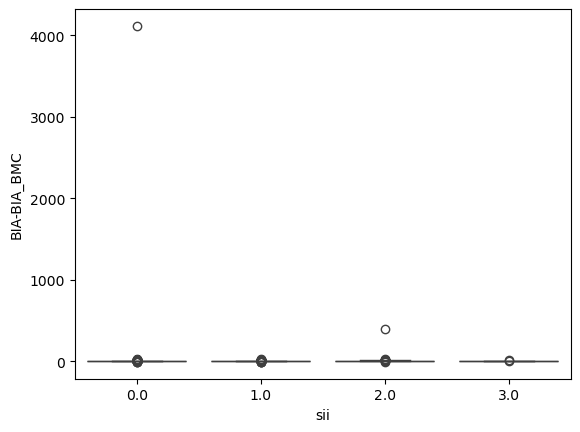

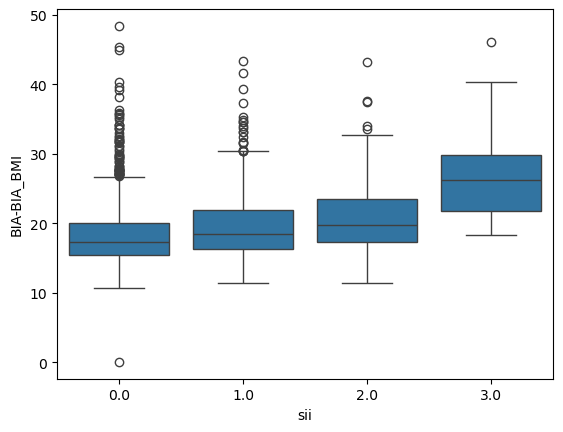

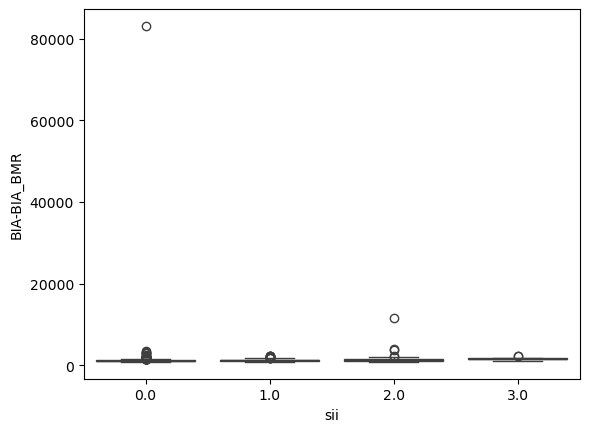

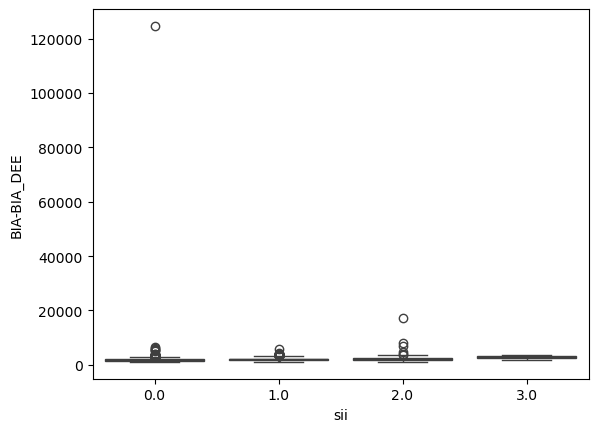

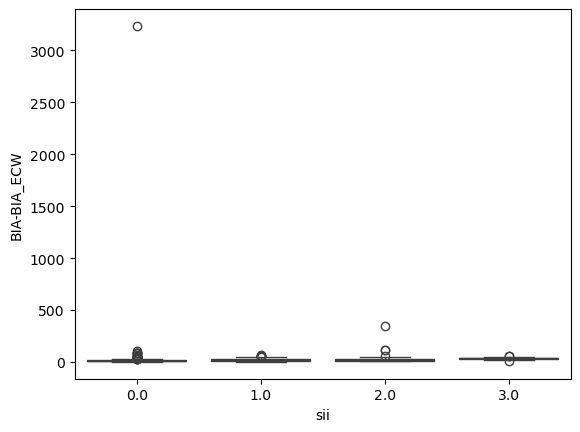

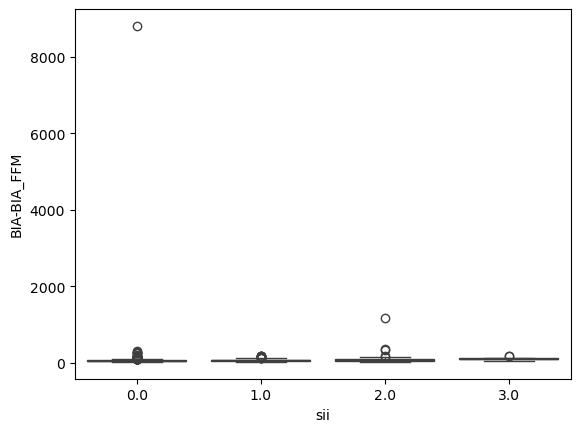

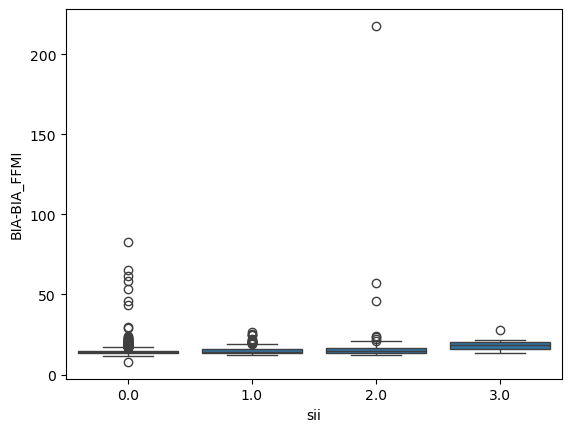

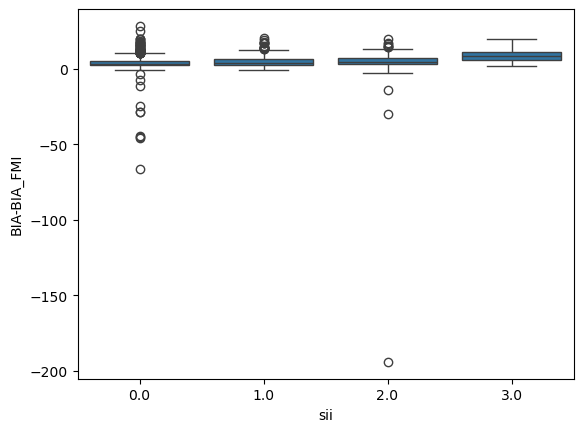

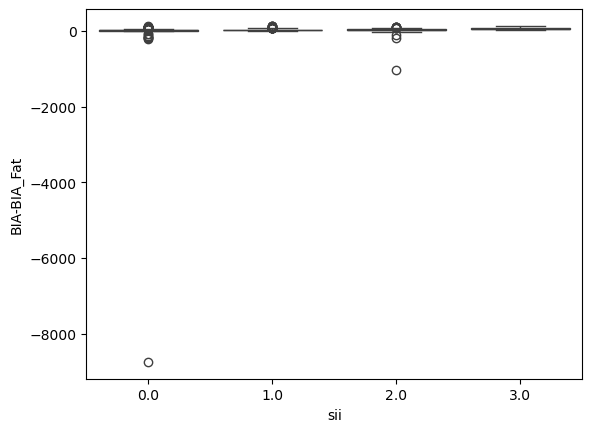

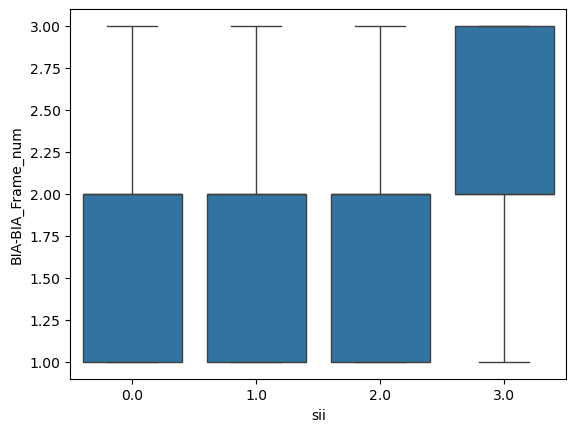

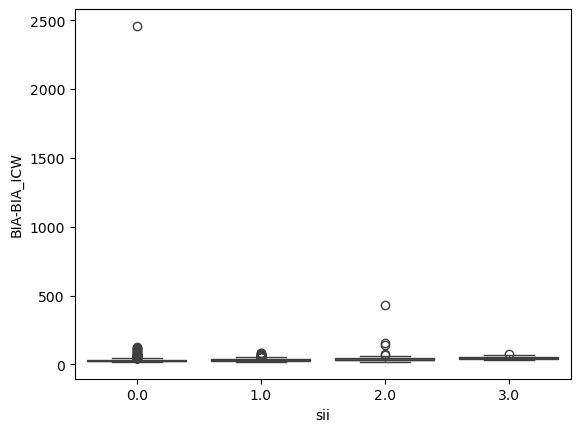

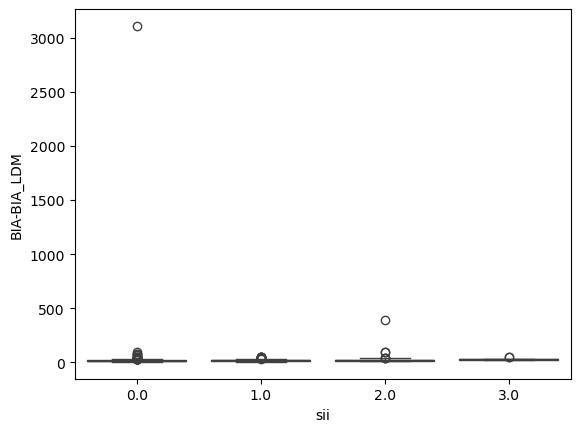

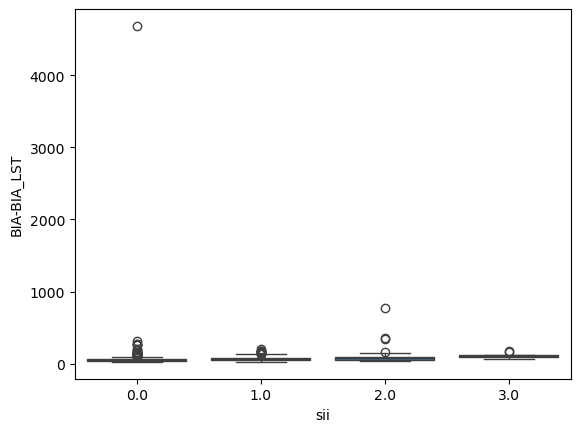

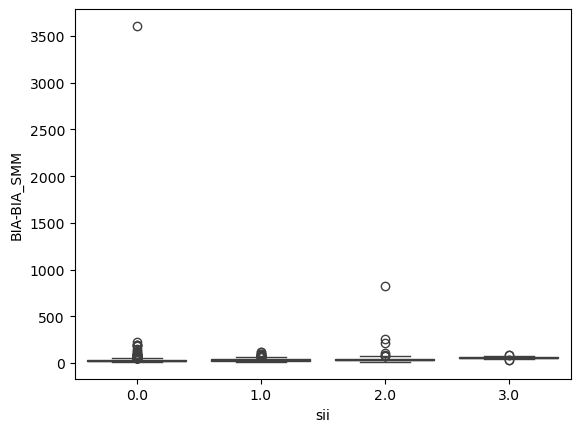

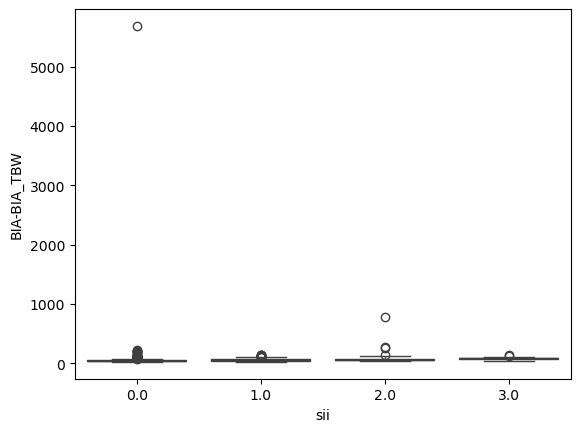

In [15]:
for i in range(len(features_BIA)):
    sns.boxplot(x = 'sii',y=features_BIA[i],
            data=train)
    plt.show()
    i+=1

To get a better visual sense if there is a relationship between sii and the various BIA variables, we define the following function which graphs all the data, and then regraphs with values above some threshhold eliminated.

In [16]:
def removal_box_plot(df, column, threshold,group):
    sns.boxplot(x=df[group],y=df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(x=removed_outliers[group],y=removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers



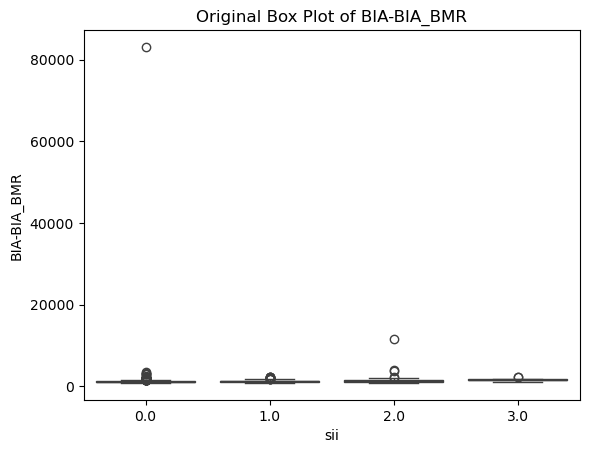

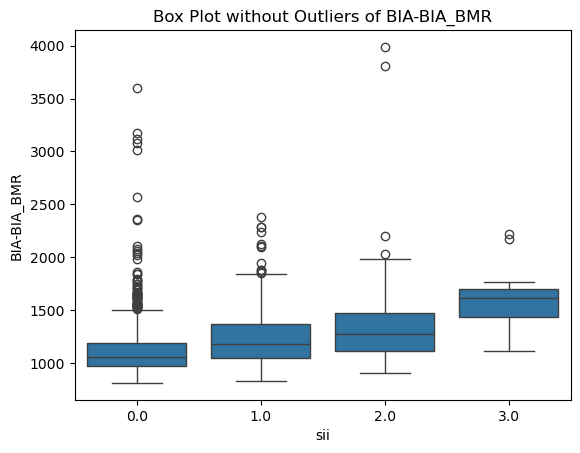

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.0,84.6,...,4.0,1.0,0.0,20.0,Winter,27.0,40.0,Fall,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,...,2.0,2.0,1.0,22.0,Fall,41.0,58.0,Fall,2.0,0.0
3954,ff759544,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,...,3.0,3.0,0.0,33.0,Summer,48.0,67.0,Summer,0.0,1.0
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0


In [17]:
threshold_value =8000
removal_box_plot(train, 'BIA-BIA_BMR', threshold_value,'sii')

In [18]:
for i in range(len(features_BIA)):
    print(train.groupby('sii')[features_BIA[i]].mean())
    i+=1

sii
0.0    2.623120
1.0    2.727083
2.0    2.726531
3.0    3.125000
Name: BIA-BIA_Activity_Level_num, dtype: float64
sii
0.0    8.129792
1.0    4.611105
2.0    6.542517
3.0    5.922235
Name: BIA-BIA_BMC, dtype: float64
sii
0.0    18.478612
1.0    19.716230
2.0    20.762492
3.0    27.350004
Name: BIA-BIA_BMI, dtype: float64
sii
0.0    1200.666236
1.0    1231.982308
2.0    1365.650073
3.0    1604.950417
Name: BIA-BIA_BMR, dtype: float64
sii
0.0    1985.432237
1.0    2090.162250
2.0    2317.002367
3.0    2849.985417
Name: BIA-BIA_DEE, dtype: float64
sii
0.0    19.441983
1.0    20.670576
2.0    25.374760
3.0    35.530687
Name: BIA-BIA_ECW, dtype: float64
sii
0.0     70.149743
1.0     73.485326
2.0     87.722696
3.0    113.211233
Name: BIA-BIA_FFM, dtype: float64
sii
0.0    14.650996
1.0    14.868098
2.0    16.399569
3.0    18.220542
Name: BIA-BIA_FFMI, dtype: float64
sii
0.0    3.827617
1.0    4.848134
2.0    4.362927
3.0    9.129454
Name: BIA-BIA_FMI, dtype: float64
sii
0.0     9.138951
1

In [19]:
train['sii'].describe()

count    2736.000000
mean        0.580409
std         0.771122
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: sii, dtype: float64

In [20]:
print(train.groupby('sii')['Basic_Demos-Sex'].value_counts())
print(train.groupby('Basic_Demos-Sex')['sii'].describe())

sii  Basic_Demos-Sex
0.0  0                  956
     1                  638
1.0  0                  481
     1                  249
2.0  0                  276
     1                  102
3.0  0                   26
     1                    8
Name: count, dtype: int64
                  count      mean       std  min  25%  50%  75%  max
Basic_Demos-Sex                                                     
0                1739.0  0.638873  0.798882  0.0  0.0  0.0  1.0  3.0
1                 997.0  0.478435  0.709082  0.0  0.0  0.0  1.0  3.0


Next I am going to work on identifying outliers.

In [21]:
print(len(train.columns))
#z=train
z=np.abs(stats.zscore(train[['BIA-BIA_BMC']],nan_policy='omit'))
print(z.describe())
threshold = 10
indices = np.where(np.all(z > threshold, axis=1))[0]
indices


82
       BIA-BIA_BMC
count  1991.000000
mean      0.055398
std       0.998715
min       0.000027
25%       0.018558
50%       0.031787
75%       0.041353
max      44.387466


array([3205])

In [22]:
train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [23]:
print(train['BIA-BIA_BMC'].iloc[[3205]])

3205    4115.36
Name: BIA-BIA_BMC, dtype: float64


In [56]:
#Identify the float columns for the data frame.train

float_columns = train.select_dtypes(include=['float']).columns
print("Float columns:", float_columns)
print(len(float_columns))
float_columns[2]

Float columns: Index(['CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Weight',
       'Physical-Waist_Circumference', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone',
       'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone',
       'FGC-FGC_PU', 'FGC-FGC_SRL', 'BIA-BIA_BMC', 'BIA-BIA_FFMI',
       'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW',
       'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW',
       'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total', 'PCIAT-PCIAT_01',
       'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05',
       'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09',
       'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13',
       'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17',

'Physical-Weight'

In [25]:
index_set=[]
for i in range(len(float_columns)):
    #print(float_columns[i])
    z=np.abs(stats.zscore(train[[float_columns[i]]],nan_policy='omit'))
    #print(z.describe())
    threshold = 10
    indices = np.where(np.all(z > threshold, axis=1))[0].flatten().tolist()
    index_set=index_set+indices
    print(indices)
    i+=1

index_set=list(set(index_set))
index_set

[2065]
[]
[]
[]
[]
[]
[]
[]
[1470, 3767]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[3205]
[]
[3205]
[3205]
[3205]
[3205]
[3147, 3511]
[3147, 3511]
[3205]
[]
[3205]
[3205]
[3205]
[3205]
[3205]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


[3511, 3205, 3147, 2065, 3767, 1470]

In [26]:
train_no_outliers=train.drop(index_set)
len(train_no_outliers)

3954

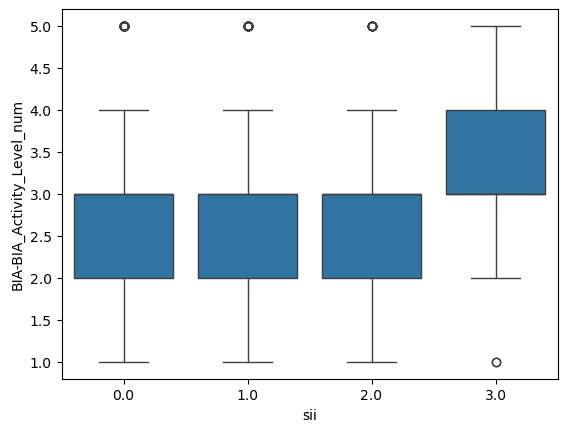

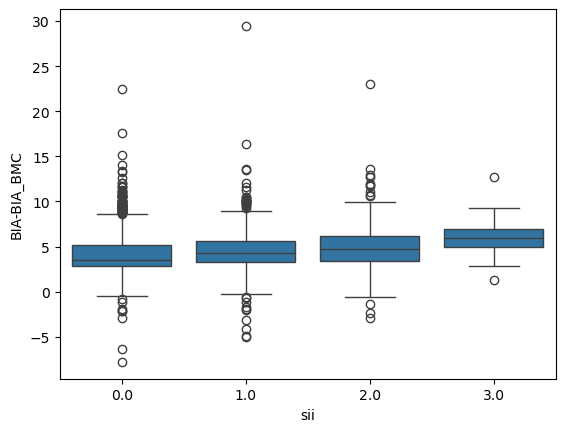

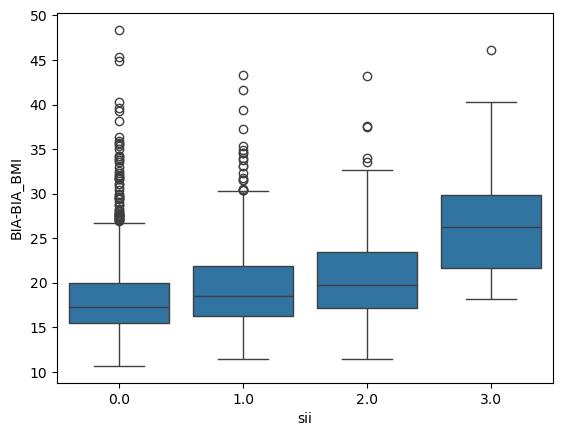

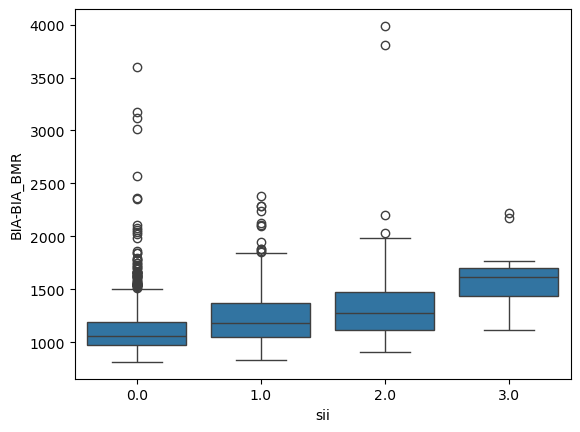

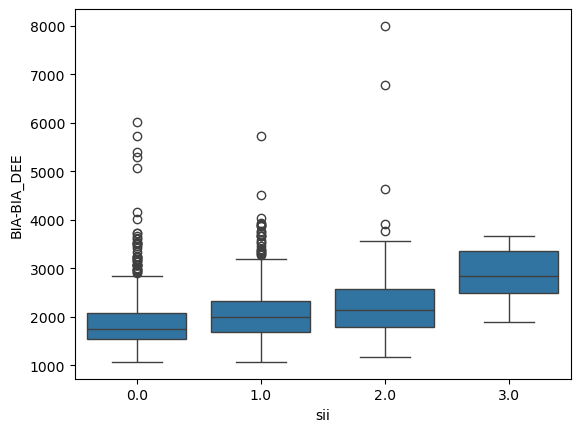

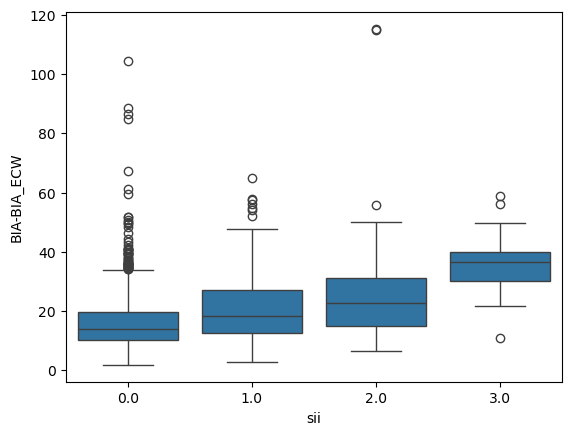

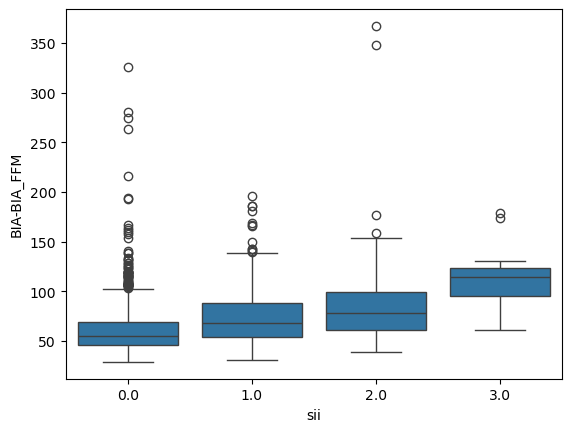

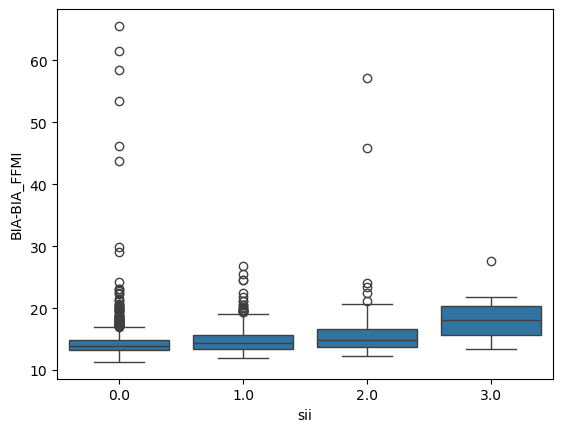

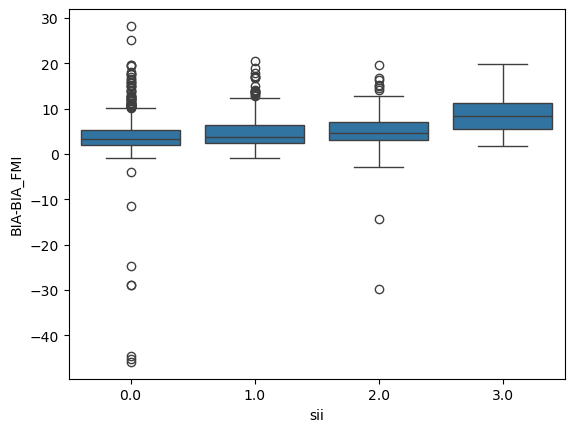

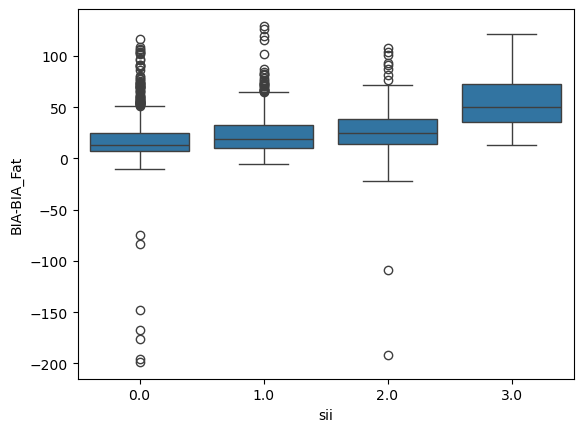

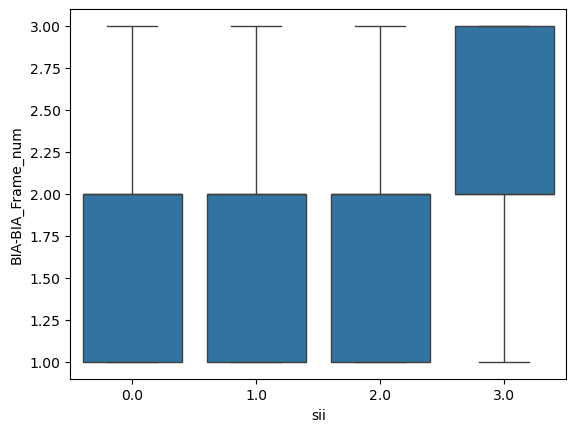

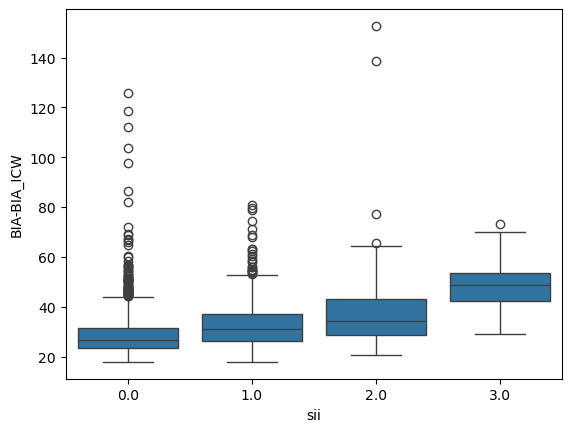

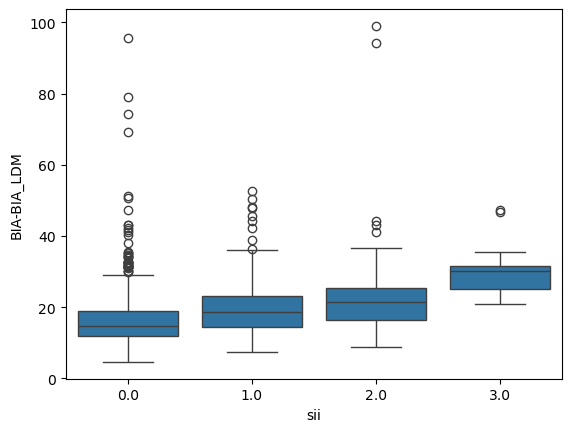

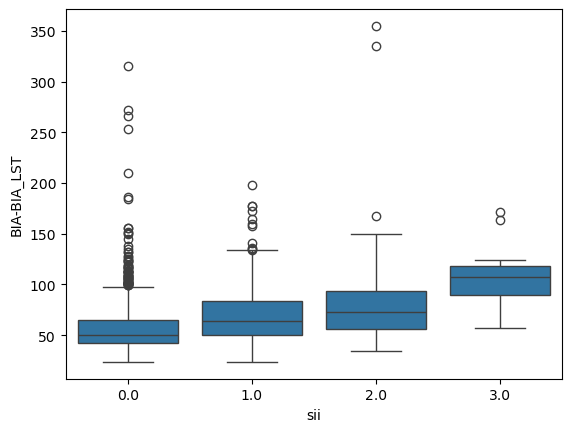

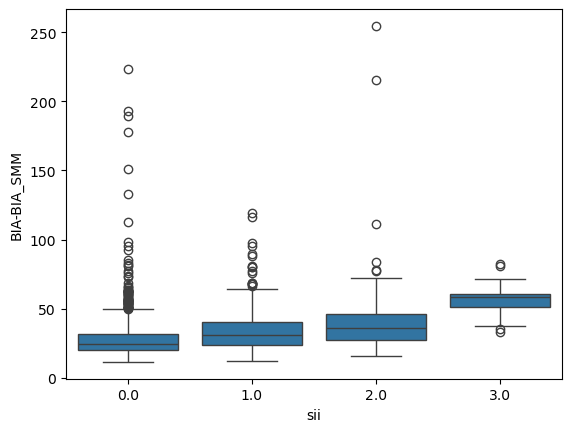

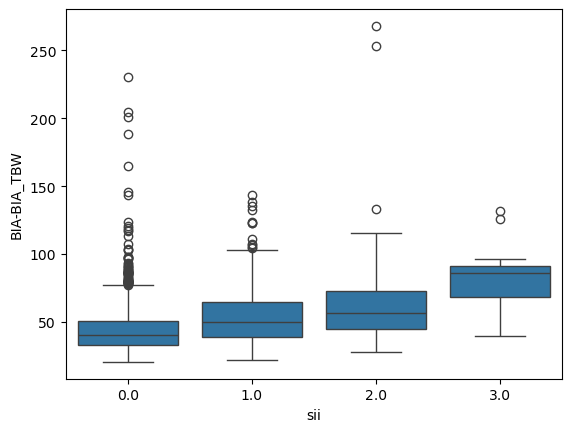

In [27]:
for i in range(len(features_BIA)):
    sns.boxplot(x = 'sii',y=features_BIA[i],
            data=train_no_outliers)
    plt.show()
    i+=1

In [28]:
features_quant=['Basic_Demos-Age','CGAS-CGAS_Score', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_GSND',
       'FGC-FGC_GSD', 'FGC-FGC_PU', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL',
       'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total',
       'PAQ_C-PAQ_C_Total','PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
       'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
       'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
       'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
       'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
       'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total',
       'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']

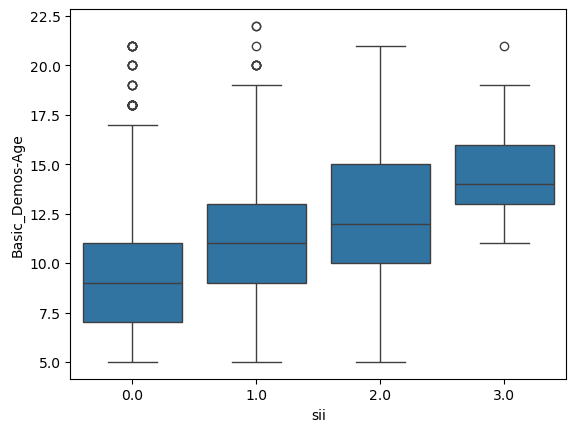

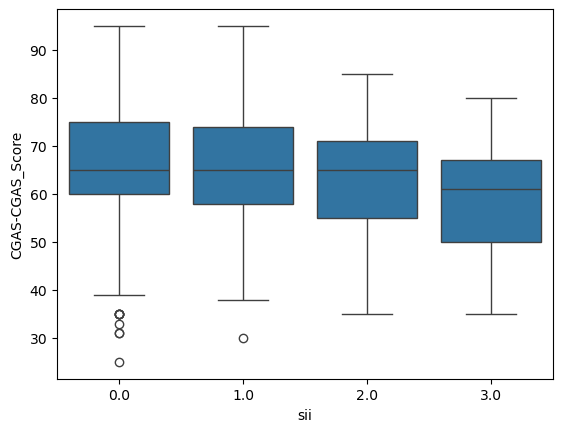

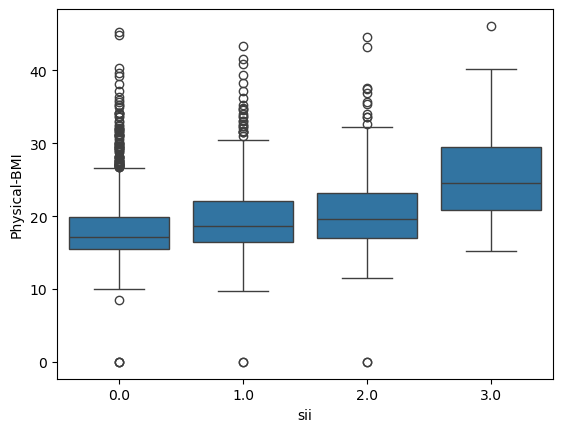

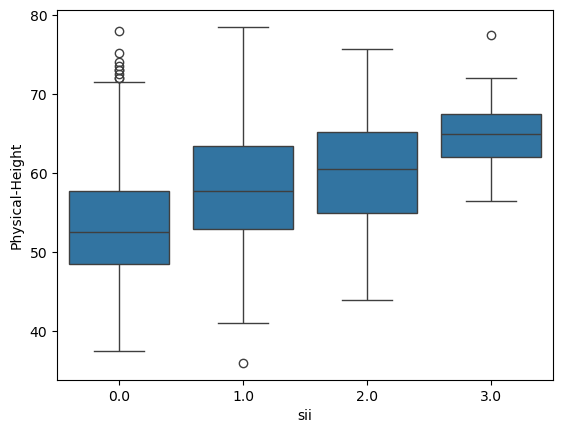

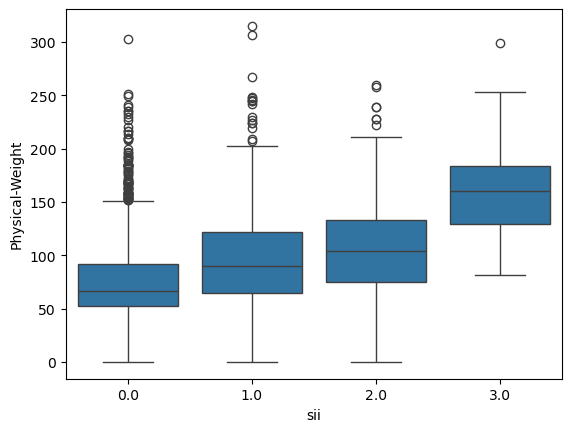

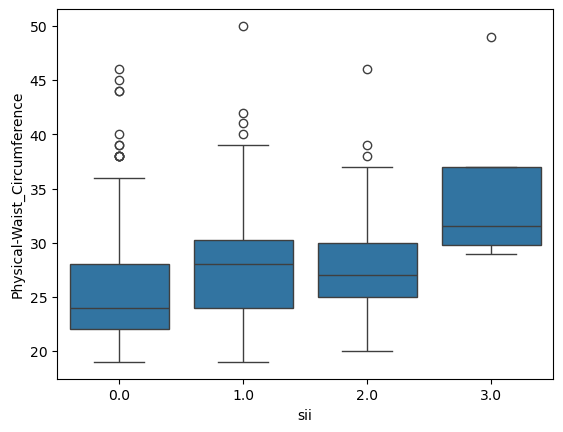

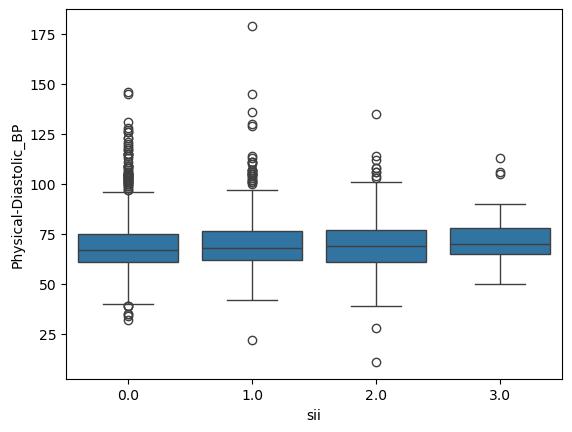

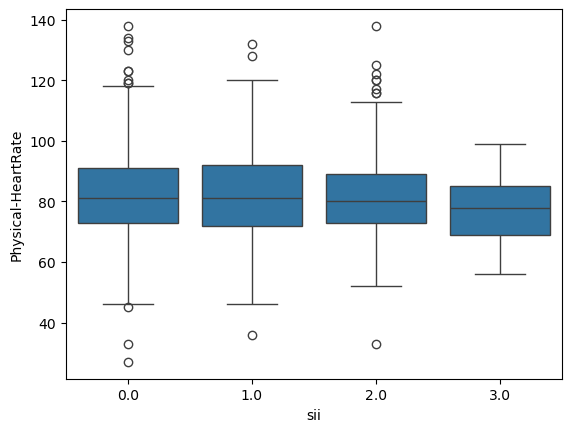

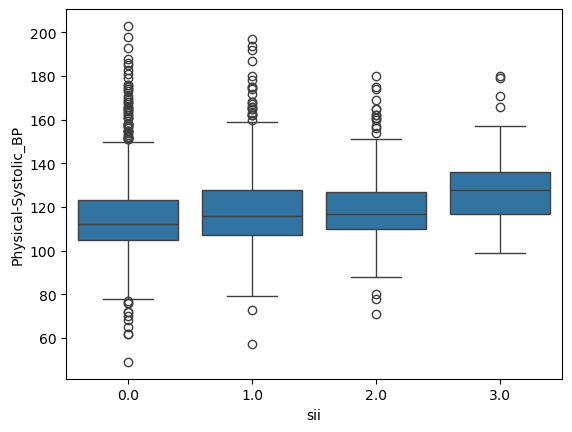

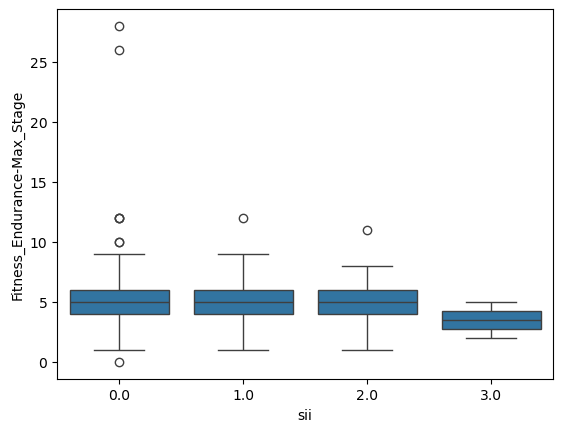

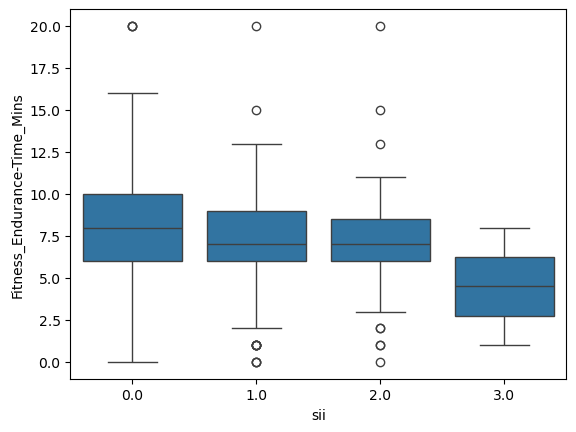

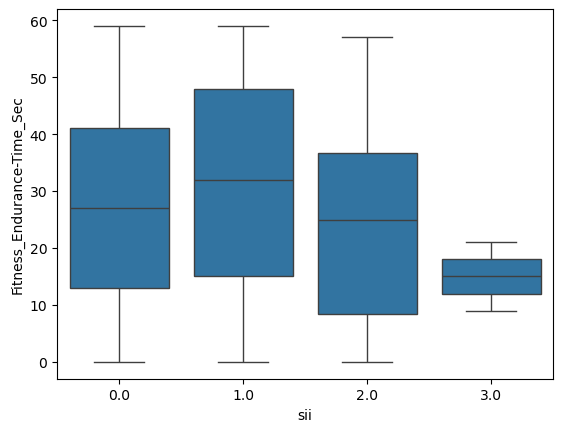

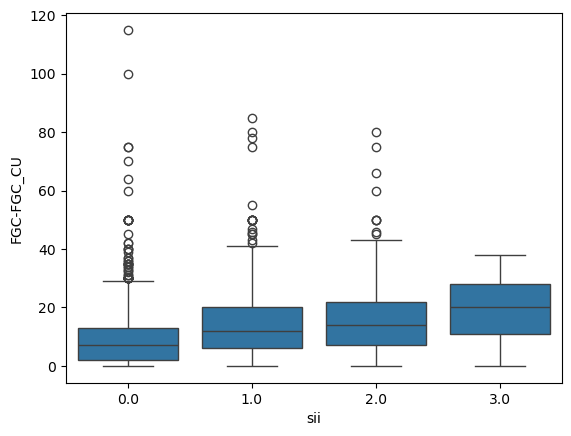

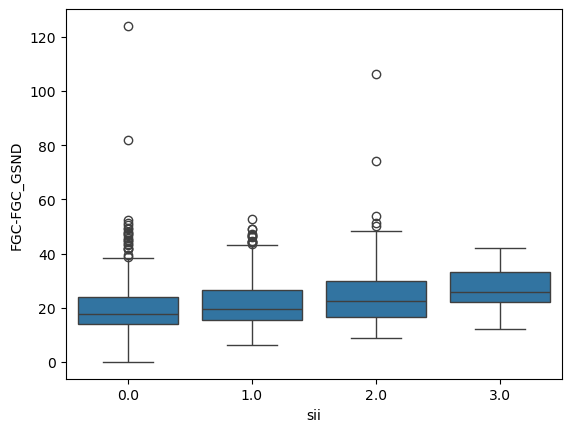

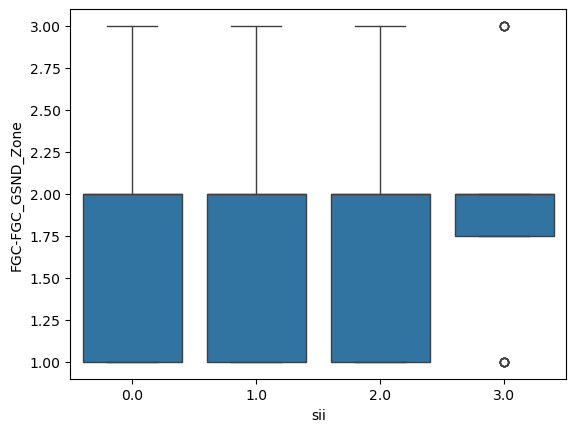

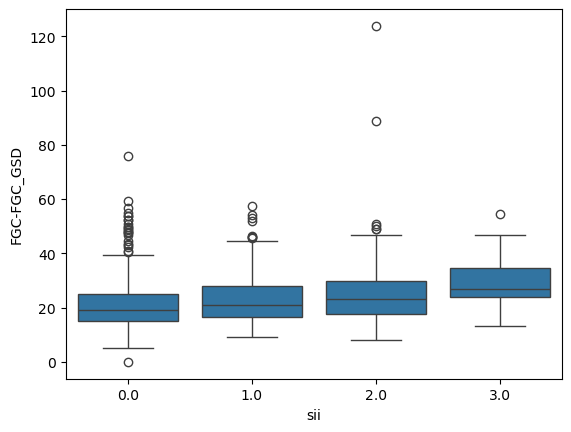

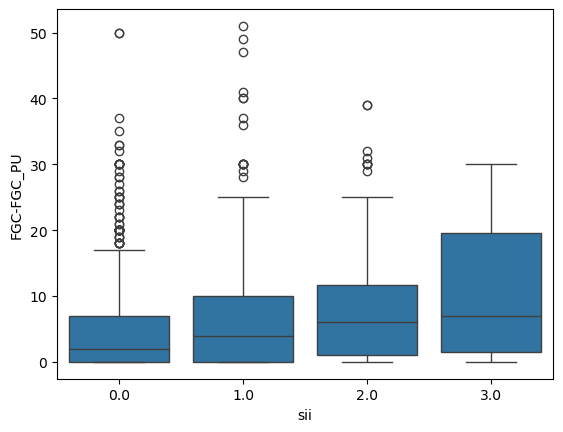

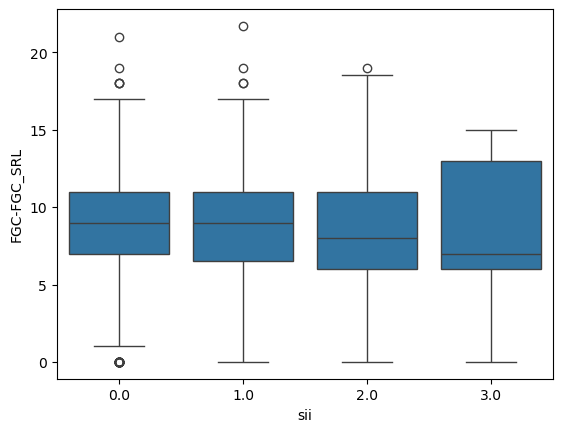

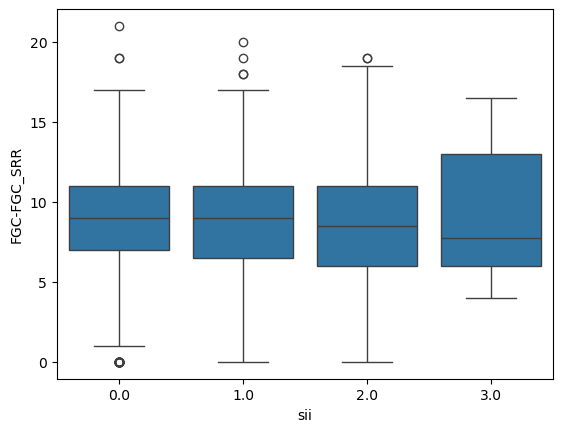

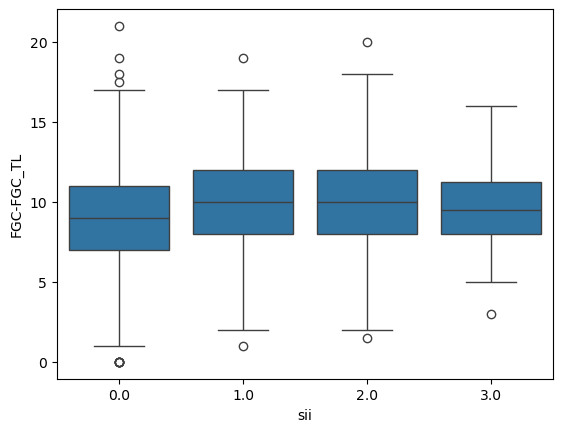

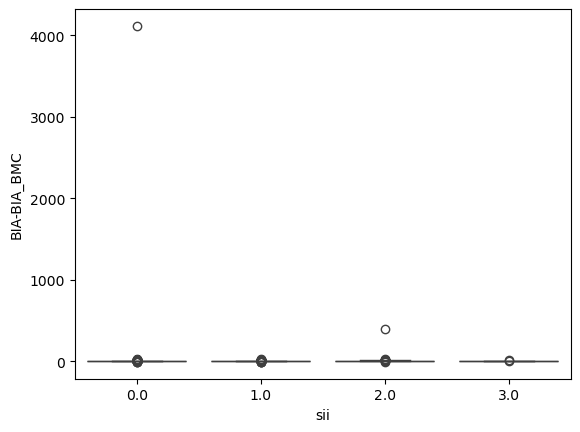

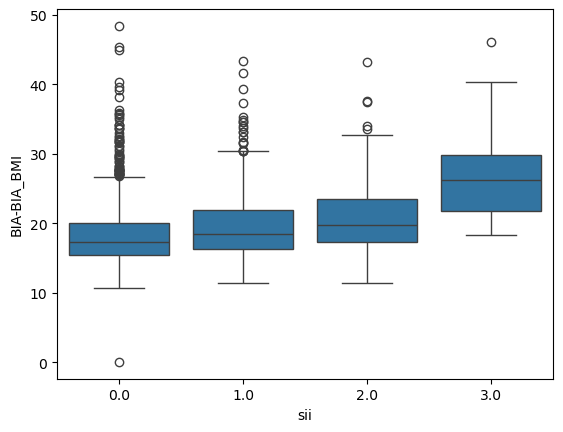

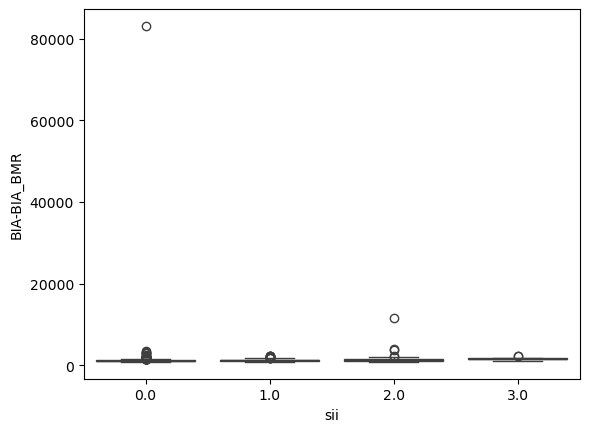

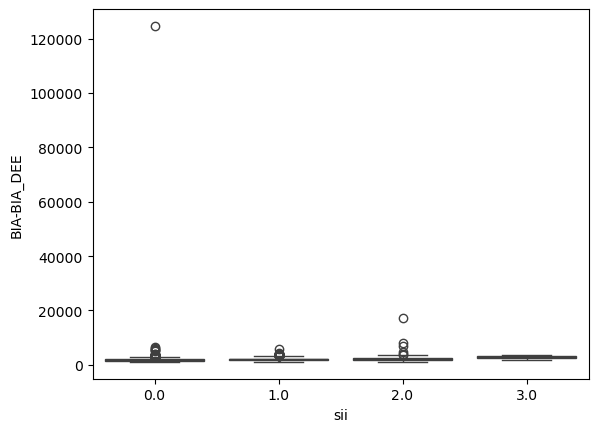

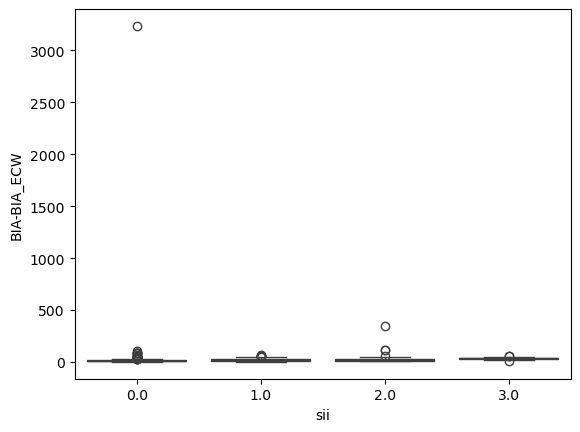

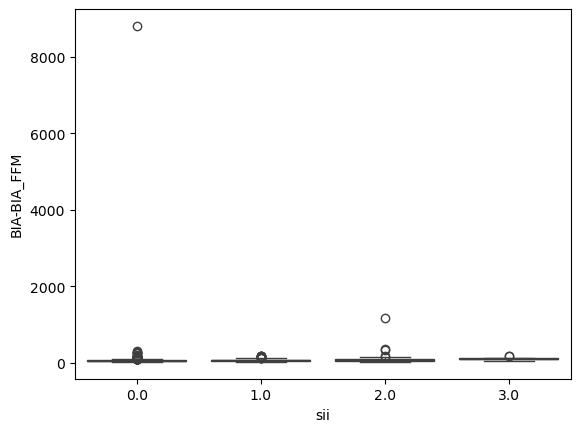

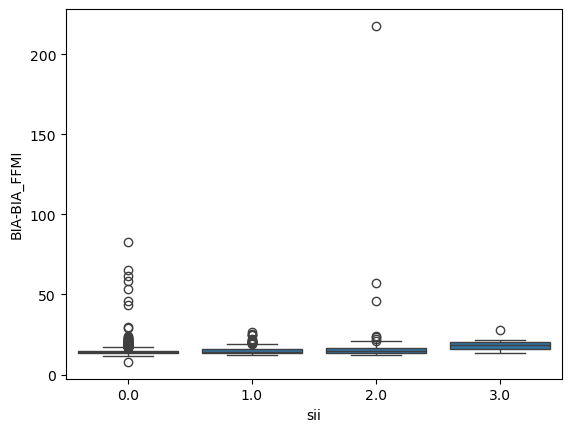

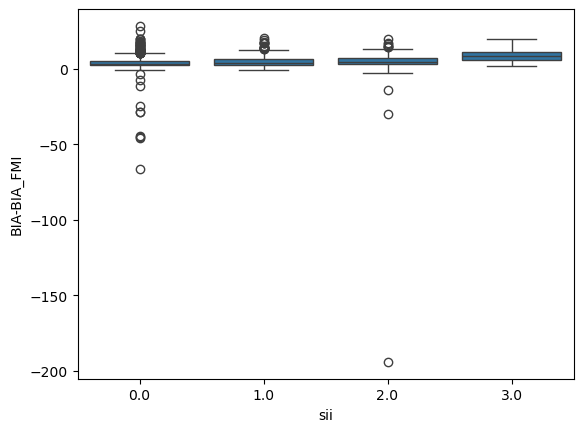

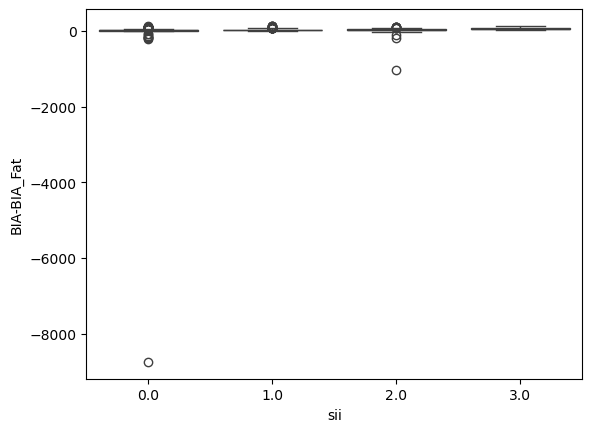

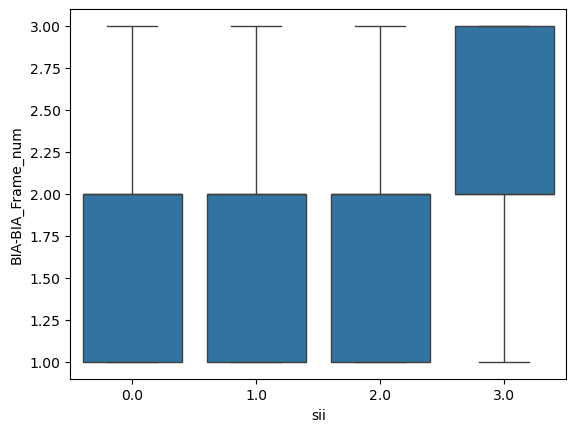

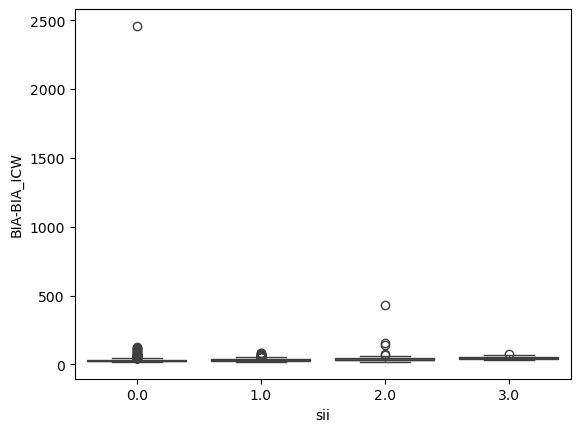

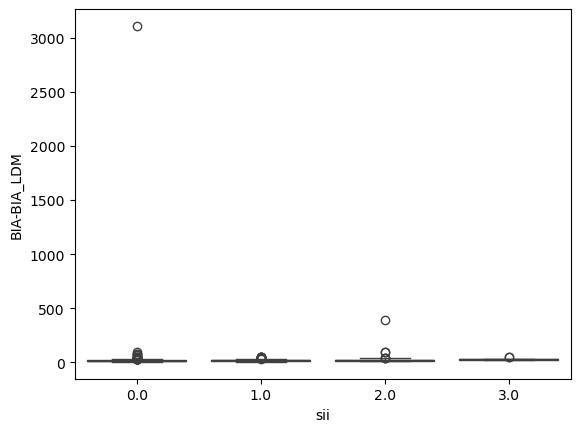

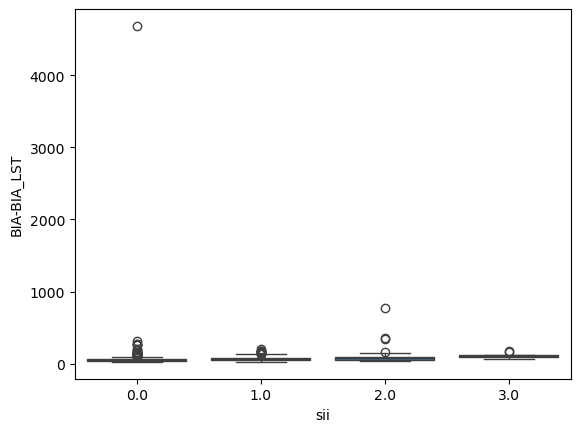

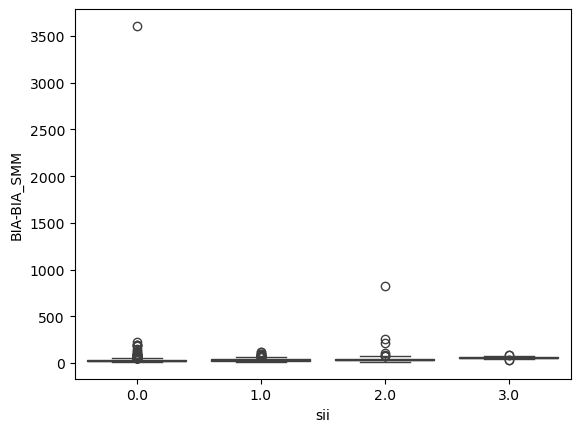

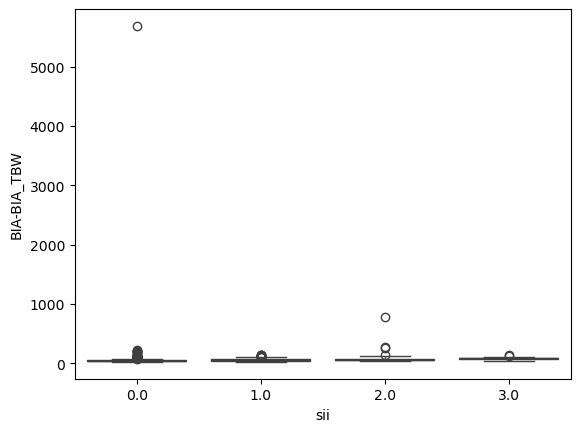

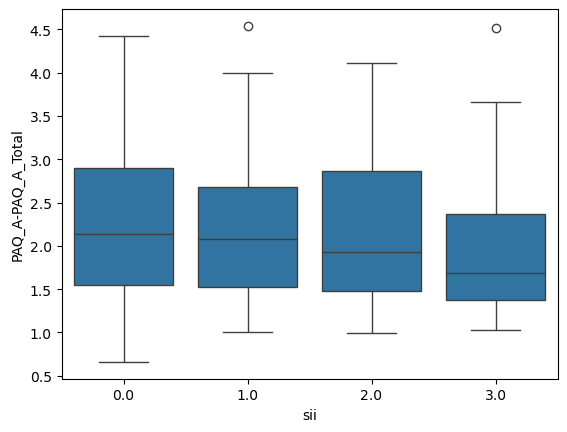

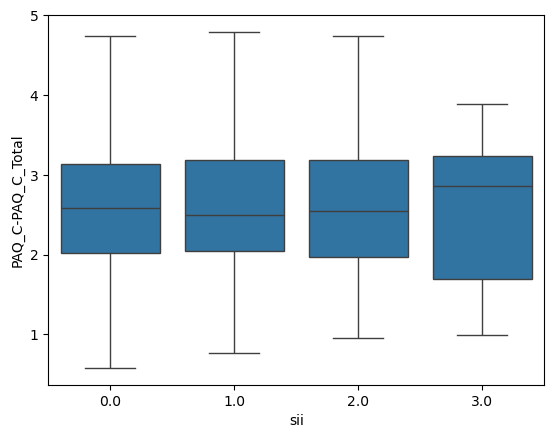

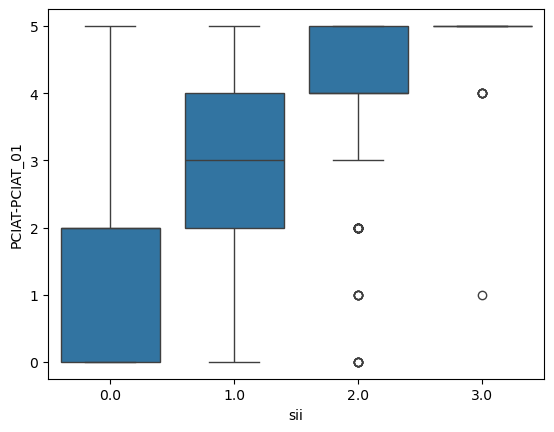

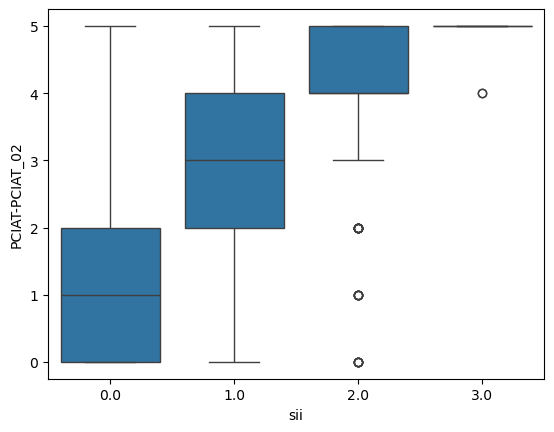

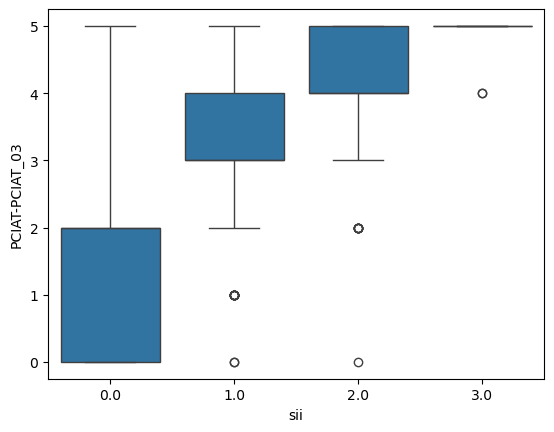

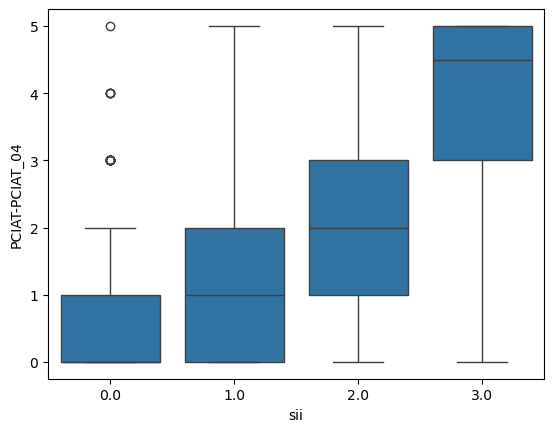

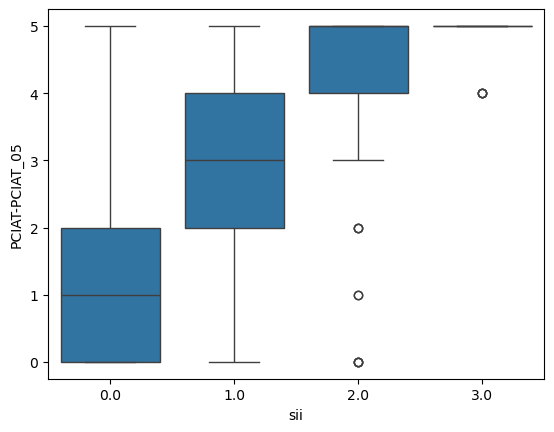

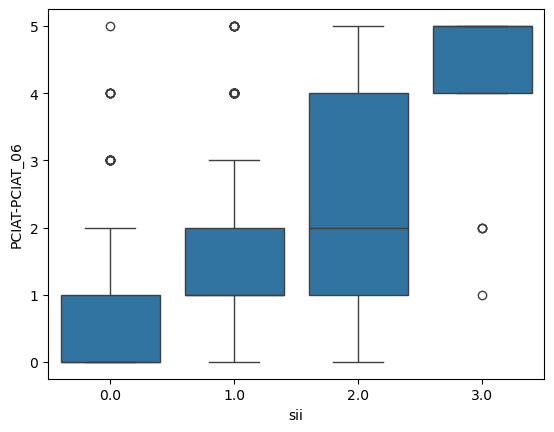

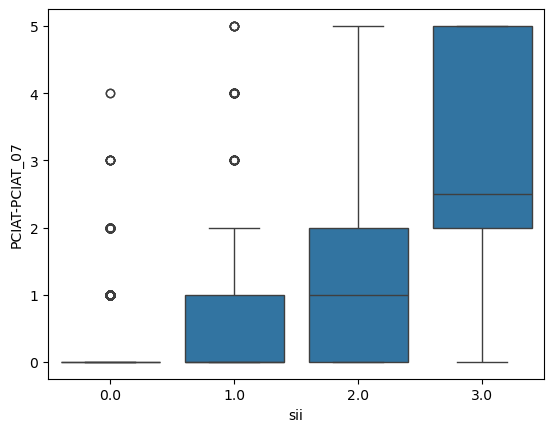

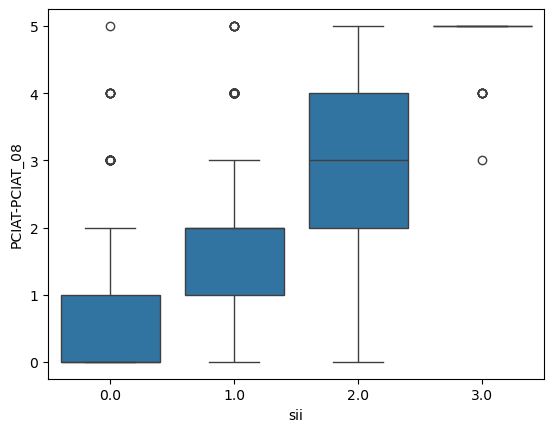

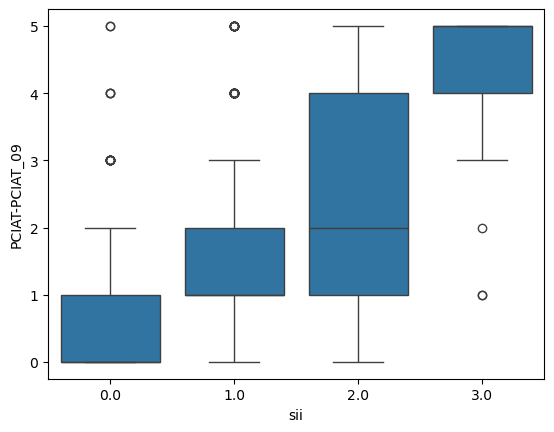

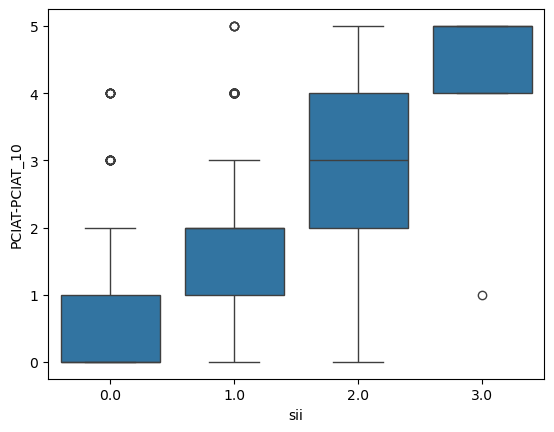

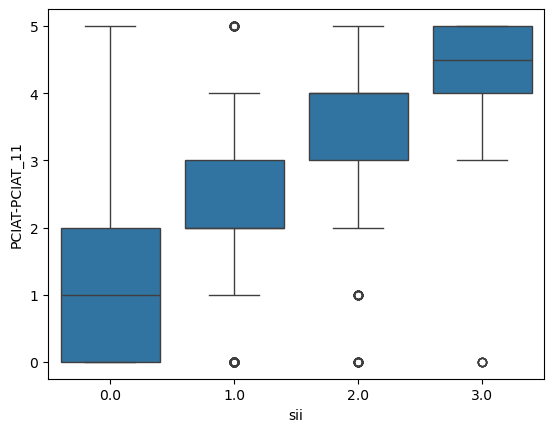

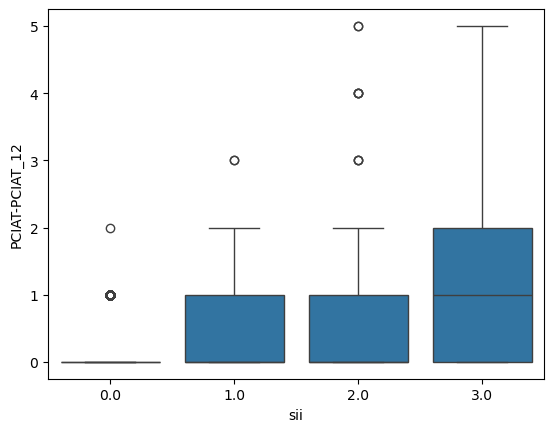

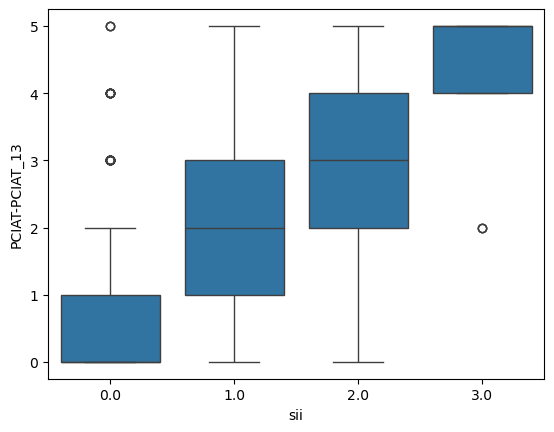

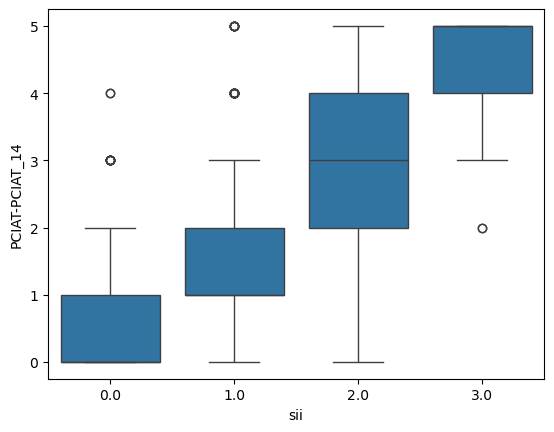

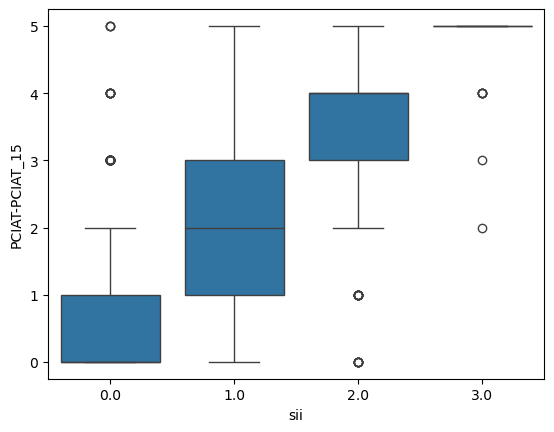

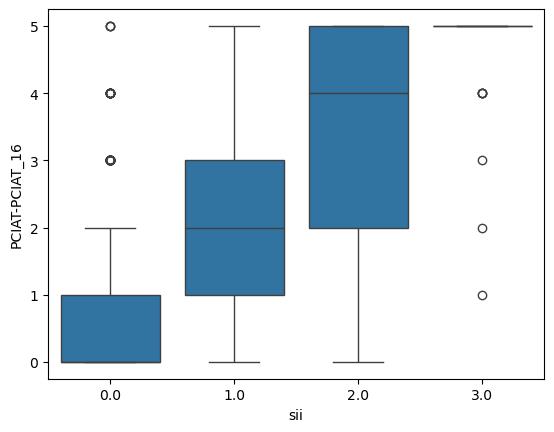

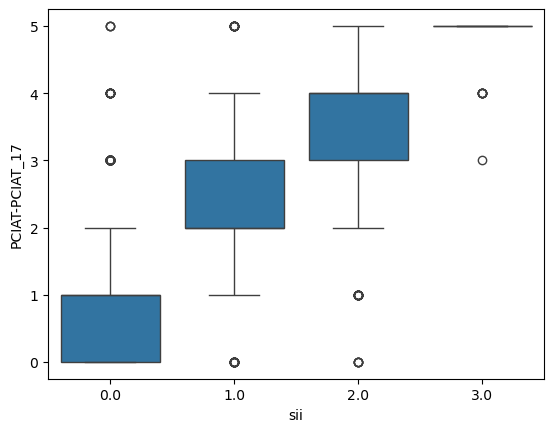

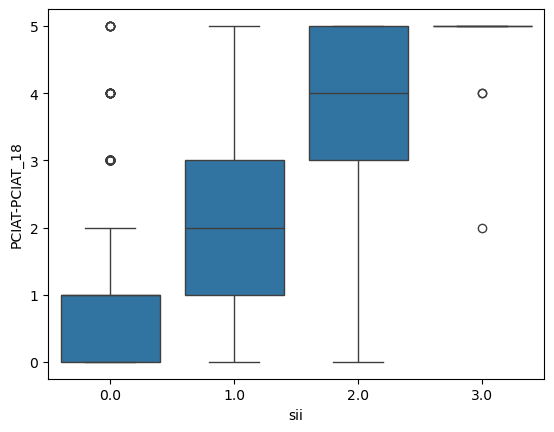

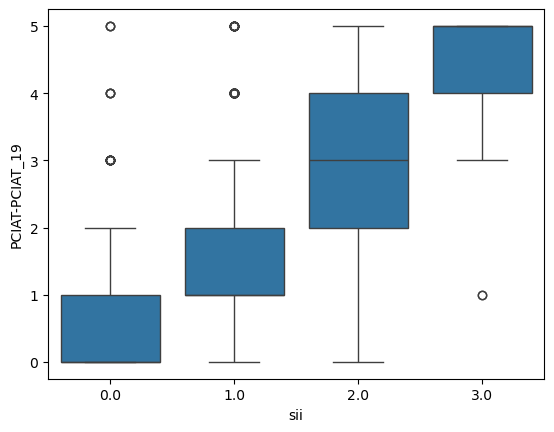

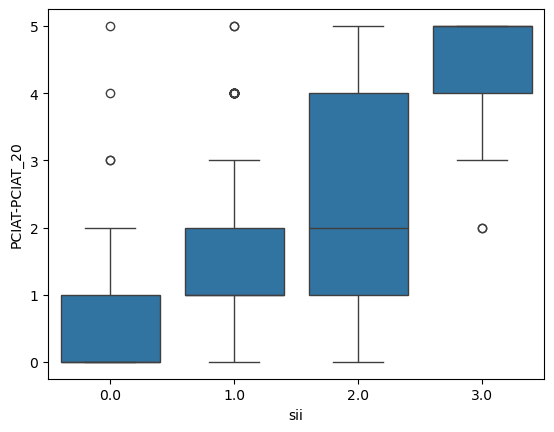

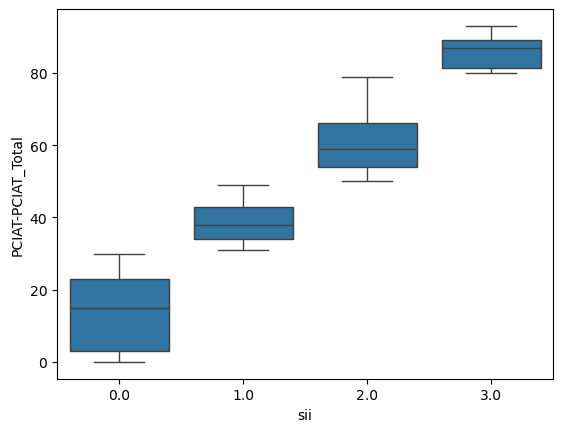

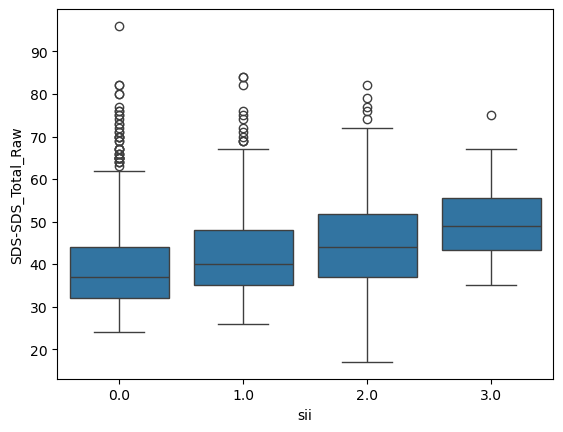

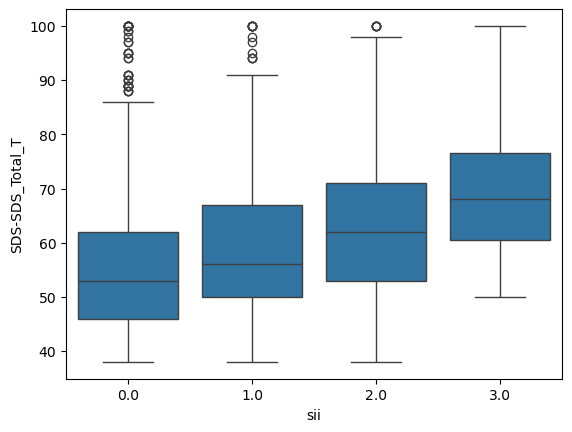

In [29]:
for i in range(len(features_quant)):
    sns.boxplot(x = 'sii',y=features_quant[i],
            data=train)
    plt.show()
    i+=1

In [49]:
index_set=[]
for i in range(len(float_columns)):
    #print(float_columns[i])
    z=np.abs(stats.zscore(train[[float_columns[i]]],nan_policy='omit'))
    #print(z.describe())
    threshold = 10
    indices_large_z = np.where(np.all(z > threshold, axis=1))[0].flatten().tolist()
    indices_negative=np.where(np.all(train[[float_columns[i]]]<0, axis=1))[0].flatten().tolist()
    index_set=index_set+indices_large_z+indices_negative
    #print(indices_large_z)
    #print(indices_negative)
    i+=1

index_set_neg_largez=list(set(index_set))
index_set_neg_largez
len(index_set_neg_largez)

68

In [41]:
train_no_outliers_no_negatives=train.drop(index_set_neg_largez)
train_no_outliers_no_negatives.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3892 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3892 non-null   object 
 1   Basic_Demos-Enroll_Season               3892 non-null   object 
 2   Basic_Demos-Age                         3892 non-null   int64  
 3   Basic_Demos-Sex                         3892 non-null   int64  
 4   CGAS-Season                             2496 non-null   object 
 5   CGAS-CGAS_Score                         2362 non-null   float64
 6   Physical-Season                         3242 non-null   object 
 7   Physical-BMI                            2956 non-null   float64
 8   Physical-Height                         2961 non-null   float64
 9   Physical-Weight                         3010 non-null   float64
 10  Physical-Waist_Circumference            892 non-null    float64
 

In [48]:
print(train['sii'].value_counts())
print(train['sii'].value_counts()-train_no_outliers_no_negatives['sii'].value_counts())


sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64
sii
0.0    34
1.0    16
2.0    13
3.0     0
Name: count, dtype: int64


In [74]:
train_outliers_neg_to_NaN=train
for i in range(len(float_columns)):
    index_set=[]
    z=np.abs(stats.zscore(train[[float_columns[i]]],nan_policy='omit'))
    threshold = 10
    indices_large_z = np.where(np.all(z > threshold, axis=1))[0].flatten().tolist()
    indices_negative=np.where(np.all(train[[float_columns[i]]]<0, axis=1))[0].flatten().tolist()
    index_set=indices_large_z+indices_negative
    #print(len(index_set))
    for j in range(len(index_set)):
        train_outliers_neg_to_NaN.at[j, float_columns[i]] = np.nan
        j+=1
    i+=1

In [75]:
train_outliers_neg_to_NaN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3959 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2420 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3020 non-null   float64
 8   Physical-Height                         3027 non-null   object 
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [72]:
#print(train['BIA-BIA_Fat'])
print(train_outliers_neg_to_NaN['BIA_BIA_Fat'])

KeyError: 'BIA_BIA_Fat'

In [63]:
train_no_outliers_no_negatives.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3892 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3892 non-null   object 
 1   Basic_Demos-Enroll_Season               3892 non-null   object 
 2   Basic_Demos-Age                         3892 non-null   int64  
 3   Basic_Demos-Sex                         3892 non-null   int64  
 4   CGAS-Season                             2496 non-null   object 
 5   CGAS-CGAS_Score                         2362 non-null   float64
 6   Physical-Season                         3242 non-null   object 
 7   Physical-BMI                            2956 non-null   float64
 8   Physical-Height                         2961 non-null   float64
 9   Physical-Weight                         3010 non-null   float64
 10  Physical-Waist_Circumference            892 non-null    float64
 